**Beliefs about Gender**
*By Pedro Bordalo, Katherine Coffman, Nicola Gennaioli, and Andrei Shleifer*

Replicated by Saul Marenco

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sfa
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t, ttest_ind
from statsmodels.regression.linear_model import OLS
import statsmodels.formula.api as smf
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
!pip install permutation_test
!pip install linearmodels
import permutation_test as p_t
from linearmodels.iv import IV2SLS




BL = pd.read_stata('/Users/saulmg/Downloads/Beliefs_about_Gender/Bank_Level_Data/20170007_Bank_Level_Data.dta')
QL = pd.read_stata('/Users/saulmg/Downloads/Beliefs_about_Gender/Question_Level_Data/20170007_Question_Level_Data.dta')



In [3]:
#Table 1: 
##This table shows the demographic proportions for participants in this study.

###The only difference between the paper and my replication was that I had 4 less total 
###observations in Women than the paper. We ran it a couple of times differently but could not find the cause.

def calculate_p_value_from_proportions(p1, p2):

    p_combined = (548 * p1 + 504 * p2) / (548 + 504)
    z = (p1 - p2) / (p_combined * (1 - p_combined) * ((1 / 548) + (1 / 504)))**0.5
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    return p_value

osu_male = sum((QL["use"] == 1) & (QL["osu"] == 1) & (QL["female"] == 0 ) & (QL["question"]==-1))
osu_fem = sum((QL["use"] == 1) & (QL["osu"] == 1) & (QL["female"] == 1 ) & (QL["question"]==-1))

hrv_male = sum((QL["use"] == 1) & (QL["harvard"] == 1) & (QL["female"] == 0 ) & (QL["question"]==-1))
hrv_fem = sum((QL["use"] == 1) & (QL["harvard"] == 1) & (QL["female"] == 1 ) & (QL["question"]==-1))

sb_male = sum((QL["use"] == 1) & (QL["sb"] == 1) & (QL["female"] == 0 ) & (QL["question"]==1))
sb_fem = sum((QL["use"] == 1) & (QL["sb"] == 1) & (QL["female"] == 1 ) & (QL["question"]==1))

std_male = sum((QL["use"] == 1) & (QL["student"] == 1) & (QL["female"] == 0 ) & ((QL["question"]==1) | (QL["question"]==-1)))
std_fem = sum((QL["use"] == 1) & (QL["student"] == 1) & (QL["female"] == 1 ) & ((QL["question"]==1) | (QL["question"]==-1)))

USHS_male = sum((QL["use"] == 1) & (QL["us_hs"] == 1) & (QL["female"] == 0 ) & ((QL["question"]==1) | (QL["question"]==-1)))
USHS_fem = sum((QL["use"] == 1) & (QL["us_hs"] == 1) & (QL["female"] == 1 ) & ((QL["question"]==1) | (QL["question"]==-1)))

whi_male = sum((QL["use"] == 1) & (QL["white"] == 1) & (QL["female"] == 0 ) & ((QL["question"]==1) | (QL["question"]==-1)))
whi_fem = sum((QL["use"] == 1) & (QL["white"] == 1) & (QL["female"] == 1 ) & ((QL["question"]==1) | (QL["question"]==-1)))

asian_male = sum((QL["use"] == 1) & (QL["asian"] == 1) & (QL["female"] == 0 ) & ((QL["question"]==1) | (QL["question"]==-1)))
asian_fem = sum((QL["use"] == 1) & (QL["asian"] == 1) & (QL["female"] == 1 ) & ((QL["question"]==1) | (QL["question"]==-1)))

lat_male = sum((QL["use"] == 1) & (QL["latino"] == 1) & (QL["female"] == 0 ) & ((QL["question"]==1) | (QL["question"]==-1)))
lat_fem = sum((QL["use"] == 1) & (QL["latino"] == 1) & (QL["female"] == 1 ) & ((QL["question"]==1) | (QL["question"]==-1)))

black_male = sum((QL["use"] == 1) & (QL["black"] == 1) & (QL["female"] == 0 ) & ((QL["question"]==1) | (QL["question"]==-1)))
black_fem = sum((QL["use"] == 1) & (QL["black"] == 1) & (QL["female"] == 1 ) & ((QL["question"]==1) | (QL["question"]==-1)))

ttl_male = osu_male + hrv_male + sb_male
ttl_fem = osu_fem + hrv_fem + sb_fem

osu_p = calculate_p_value_from_proportions(osu_male/ttl_male, osu_fem/ttl_fem)
hrv_p = calculate_p_value_from_proportions(hrv_male/ttl_male, hrv_fem/ttl_fem)
sb_p = calculate_p_value_from_proportions(sb_male/ttl_male, sb_fem/ttl_fem)
std_p = calculate_p_value_from_proportions(std_male/ttl_male, std_fem/ttl_fem)
USHS_p = calculate_p_value_from_proportions(USHS_male/ttl_male, USHS_fem/ttl_fem)
whi_p = calculate_p_value_from_proportions(whi_male/ttl_male, whi_fem/ttl_fem)
asian_p = calculate_p_value_from_proportions(asian_male/ttl_male, asian_fem/ttl_fem)
lat_p = calculate_p_value_from_proportions(lat_male/ttl_male, lat_fem/ttl_fem)
black_p = calculate_p_value_from_proportions(black_male/ttl_male, black_fem/ttl_fem)


data_t_1 = {"Men":[ osu_male /ttl_male,hrv_male /ttl_male, sb_male/ ttl_male, " ",std_male /ttl_male ,USHS_male /ttl_male,"",
                   whi_male / ttl_male,asian_male / ttl_male,lat_male / ttl_male, black_male / ttl_male,"",ttl_male], 
            "Women":[osu_fem / ttl_fem, hrv_fem/ ttl_fem, sb_fem /ttl_fem," ",std_fem/ ttl_fem, USHS_fem / ttl_fem,"",
                     whi_fem / ttl_fem,asian_fem / ttl_fem,lat_fem / ttl_fem,black_fem / ttl_fem,"", ttl_fem],
            "p-value":[osu_p, hrv_p, sb_p," ", std_p, USHS_p,"", whi_p, asian_p,
                                        lat_p, black_p,"", ""]}
Table_1 = pd.DataFrame(data_t_1, index =["Proportion OSU participants", "Proportion Harvard participants", "Proportion UCSB participants"," ",
                                         "Current student", "Attended US high school", "Ethnicity", "  Caucasian", "  East Asian", "  Latino", 
                                        "  Black or African American", " ", "Observations"]) 

print(Table_1)



                                      Men     Women   p-value
Proportion OSU participants      0.394161   0.34127  0.075699
Proportion Harvard participants  0.233577  0.246032  0.636326
Proportion UCSB participants     0.372263  0.412698  0.179509
                                                             
Current student                   0.99635  0.996032  0.933149
Attended US high school          0.899635   0.85119  0.017071
Ethnicity                                                    
  Caucasian                      0.541971  0.361111       0.0
  East Asian                     0.189781  0.321429  0.000001
  Latino                         0.113139  0.121032   0.69062
  Black or African American      0.058394  0.071429  0.390385
                                                             
Observations                          548       504          


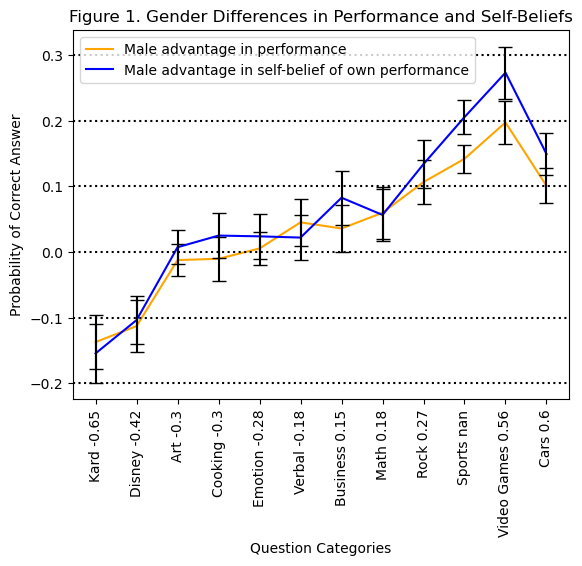

In [4]:
#Figure 1:
##This figure reports actual and believed performance differences between genders.
##In this figure, we use males as reference, but the difference between both genders is the same,
##it would've just been negative for every positive and positive for every negative if we used
##females as reference.

###The replicated graph is the same as the paper's and the confidence intervals
###also follow the same pattern as the paper.

#Average Slider Scale Rankings (Perception) for Each Category (Labels in the x-axis)

cond_kard = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["question"]==1)
avg_kard_scl = round(QL.loc[cond_kard, "perception"].mean(), 2)

cond_dis = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["question"]==11)
avg_dis_scl = round(QL.loc[cond_dis, "perception"].mean(), 2)

cond_art= (QL["use"] == 1) & (QL["art"] == 1) & (QL["question"]==-1)
avg_art_scl = round(QL.loc[cond_art, "perception"].mean(), 2)

cond_cook= (QL["use"] == 1) & (QL["cook"] == 1) & (QL["question"]==21)
avg_cook_scl = round(QL.loc[cond_cook, "perception"].mean(), 2)

cond_emo= (QL["use"] == 1) & (QL["emo"] == 1) & (QL["question"]==-131)
avg_emo_scl = round(QL.loc[cond_emo, "perception"].mean(), 2)

cond_ver= (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["question"]==-31)
avg_ver_scl = round(QL.loc[cond_ver, "perception"].mean(), 2)

cond_bus= (QL["use"] == 1) & (QL["bus"] == 1) & (QL["question"]==-121)
avg_bus_scl = round(QL.loc[cond_bus, "perception"].mean(), 2)

cond_math= (QL["use"] == 1) & (QL["math"] == 1) & (QL["question"]==-21)
avg_math_scl = round(QL.loc[cond_math, "perception"].mean(), 2)

cond_rock= (QL["use"] == 1) & (QL["rock"] == 1) & (QL["question"]==51)
avg_rock_scl = round(QL.loc[cond_rock, "perception"].mean(), 2)

cond_sports= (QL["use"] == 1) & (QL["sports"] == 1) & (QL["question"]==-31)
avg_sports_scl = round(QL.loc[cond_sports, "perception"].mean(), 2)

cond_vg= (QL["use"] == 1) & (QL["vg"] == 1) & (QL["question"]==31)
avg_vg_scl = round(QL.loc[cond_vg, "perception"].mean(), 2)

cond_cars= (QL["use"] == 1) & (QL["cars"] == 1) & (QL["question"]==41)
avg_cars_scl = round(QL.loc[cond_cars, "perception"].mean(), 2)


#Functions for calculating confidence interval. Difference between the two
#is that one takes into account the difference in ability and belief.


def calculate_mean_ci(data, alpha=0.05):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    
    t_statistic = stats.t.ppf(1 - alpha / 2, df=n - 1)
    margin_error = t_statistic * (std / np.sqrt(n))
    
    confidence_interval = ((mean - margin_error)-(mean + margin_error))/2
    
    return confidence_interval

def calculate_mean_difference_ci(data1, data2, alpha=0.05):
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    std1 = np.std(data1, ddof=1)
    std2 = np.std(data2, ddof=1)
    
    df = len(data1) + len(data2) - 2
    se = np.sqrt((std1**2 / len(data1)) + (std2**2 / len(data2)))
    t_statistic = (mean1 - mean2) / se
    margin_error = stats.t.ppf(1 - alpha / 2, df) * se
    confidence_interval = (((mean1 - mean2) - margin_error)-((mean1 - mean2) + margin_error))/2
    
    return confidence_interval

#Average ability (y-values), with confidence intervals underneath.

ttl_kard_male = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 0) & (QL["question"]==1)
ttl_kard_fem = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 1) & (QL["question"]==1)
avg_kard_dif = (QL.loc[ttl_kard_male, "avgability"].mean())-(QL.loc[ttl_kard_fem, "avgability"].mean())
ci_kard_abi = calculate_mean_difference_ci(QL.loc[ttl_kard_male, "avgability"], QL.loc[ttl_kard_fem, "avgability"])

ttl_dis_male = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 0) & (QL["question"]==11)
ttl_dis_fem = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 1) & (QL["question"]==11)
avg_dis_dif = (QL.loc[ttl_dis_male, "avgability"].mean())-(QL.loc[ttl_dis_fem, "avgability"].mean())
ci_dis_abi = calculate_mean_difference_ci(QL.loc[ttl_dis_male, "avgability"], QL.loc[ttl_dis_fem, "avgability"])

ttl_art_male = (QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 0) & (QL["question"]==-1)
ttl_art_fem = (QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 1) & (QL["question"]==-1)
avg_art_dif = (QL.loc[ttl_art_male, "avgability"].mean())-(QL.loc[ttl_art_fem, "avgability"].mean())
ci_art_abi = calculate_mean_difference_ci(QL.loc[ttl_art_male, "avgability"], QL.loc[ttl_art_fem, "avgability"])

ttl_cook_male = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 0) & (QL["question"]==21)
ttl_cook_fem = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 1) & (QL["question"]==21)
avg_cook_dif = (QL.loc[ttl_cook_male, "avgability"].mean())-(QL.loc[ttl_cook_fem, "avgability"].mean())
ci_cook_abi = calculate_mean_difference_ci(QL.loc[ttl_cook_male, "avgability"], QL.loc[ttl_cook_fem, "avgability"])

ttl_emo_male = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 0) & (QL["question"]==-131)
ttl_emo_fem = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 1) & (QL["question"]==-131)
avg_emo_dif = (QL.loc[ttl_emo_male, "avgability"].mean())-(QL.loc[ttl_emo_fem, "avgability"].mean())
ci_emo_abi = calculate_mean_difference_ci(QL.loc[ttl_emo_male, "avgability"], QL.loc[ttl_emo_fem, "avgability"])

ttl_verbal_male = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 0) & (QL["question"]==-31)
ttl_verbal_fem = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 1) & (QL["question"]==-31)
avg_verbal_dif = (QL.loc[ttl_verbal_male, "avgability"].mean())-(QL.loc[ttl_verbal_fem, "avgability"].mean())
ci_verbal_abi = calculate_mean_difference_ci(QL.loc[ttl_verbal_male, "avgability"], QL.loc[ttl_verbal_fem, "avgability"])

ttl_bus_male = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 0) & (QL["question"]==-121)
ttl_bus_fem = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 1) & (QL["question"]==-121)
avg_bus_dif = (QL.loc[ttl_bus_male, "avgability"].mean())-(QL.loc[ttl_bus_fem, "avgability"].mean())
ci_bus_abi = calculate_mean_difference_ci(QL.loc[ttl_bus_male, "avgability"], QL.loc[ttl_bus_fem, "avgability"])

ttl_math_male = (QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 0) & (QL["question"]==-21)
ttl_math_fem = (QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 1) & (QL["question"]==-21)
avg_math_dif = (QL.loc[ttl_math_male, "avgability"].mean())-(QL.loc[ttl_math_fem, "avgability"].mean())
ci_math_abi = calculate_mean_difference_ci(QL.loc[ttl_math_male, "avgability"], QL.loc[ttl_math_fem, "avgability"])

ttl_rock_male = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 0) & (QL["question"]==51)
ttl_rock_fem = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 1) & (QL["question"]==51)
avg_rock_dif = (QL.loc[ttl_rock_male, "avgability"].mean())-(QL.loc[ttl_rock_fem, "avgability"].mean())
ci_rock_abi = calculate_mean_difference_ci(QL.loc[ttl_rock_male, "avgability"], QL.loc[ttl_rock_fem, "avgability"])

ttl_sports_male = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 0) & (QL["question"]==-11)
ttl_sports_fem = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 1) & (QL["question"]==-11)
avg_sports_dif = (QL.loc[ttl_sports_male, "avgability"].mean())-(QL.loc[ttl_sports_fem, "avgability"].mean())
ci_sports_abi = calculate_mean_difference_ci(QL.loc[ttl_sports_male, "avgability"], QL.loc[ttl_sports_fem, "avgability"])

ttl_vg_male = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 0) & (QL["question"]==31)
ttl_vg_fem = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 1) & (QL["question"]==31)
avg_vg_dif = (QL.loc[ttl_vg_male, "avgability"].mean())-(QL.loc[ttl_vg_fem, "avgability"].mean())
ci_vg_abi = calculate_mean_difference_ci(QL.loc[ttl_vg_male, "avgability"], QL.loc[ttl_vg_fem, "avgability"])

ttl_cars_male = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 0) & (QL["question"]==41)
ttl_cars_fem = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 1) & (QL["question"]==41)
avg_cars_dif = (QL.loc[ttl_cars_male, "avgability"].mean())-(QL.loc[ttl_cars_fem, "avgability"].mean())
ci_cars_abi = calculate_mean_difference_ci(QL.loc[ttl_cars_male, "avgability"], QL.loc[ttl_cars_fem, "avgability"])

#Average Self-belief (other y-axis values), with confidence intervals underneath.

self_kard_male = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 0) & (QL["question"]==1)
self_kard_fem = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 1) & (QL["question"]==1)
avg_self_kard_dif = (QL.loc[self_kard_male, "avgselfbelief"].mean())-(QL.loc[self_kard_fem, "avgselfbelief"].mean())
ci_kard_self = calculate_mean_difference_ci(QL.loc[self_kard_male, "avgselfbelief"], QL.loc[self_kard_fem, "avgselfbelief"])

self_dis_male = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 0) & (QL["question"]==11)
self_dis_fem = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 1) & (QL["question"]==11)
avg_self_dis_dif = (QL.loc[self_dis_male, "avgselfbelief"].mean())-(QL.loc[self_dis_fem, "avgselfbelief"].mean())
ci_dis_self = calculate_mean_difference_ci(QL.loc[self_dis_male, "avgselfbelief"], QL.loc[self_dis_fem, "avgselfbelief"])

self_art_male = (QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 0) & (QL["question"]==-1)
self_art_fem = (QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 1) & (QL["question"]==-1)
avg_self_art_dif = (QL.loc[self_art_male, "avgselfbelief"].mean())-(QL.loc[self_art_fem, "avgselfbelief"].mean())
ci_art_self = calculate_mean_difference_ci(QL.loc[self_art_male, "avgselfbelief"], QL.loc[self_art_fem, "avgselfbelief"])

self_cook_male = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 0) & (QL["question"]==21)
self_cook_fem = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 1) & (QL["question"]==21)
avg_self_cook_dif = (QL.loc[self_cook_male, "avgselfbelief"].mean())-(QL.loc[self_cook_fem, "avgselfbelief"].mean())
ci_cook_self = calculate_mean_difference_ci(QL.loc[self_cook_male, "avgselfbelief"], QL.loc[self_cook_fem, "avgselfbelief"])

self_emo_male = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 0) & (QL["question"]==-131)
self_emo_fem = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 1) & (QL["question"]==-131)
avg_self_emo_dif = (QL.loc[self_emo_male, "avgselfbelief"].mean())-(QL.loc[self_emo_fem, "avgselfbelief"].mean())
ci_emo_self = calculate_mean_difference_ci(QL.loc[self_emo_male, "avgselfbelief"], QL.loc[self_emo_fem, "avgselfbelief"])

self_verbal_male = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 0) & (QL["question"]==-31)
self_verbal_fem = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 1) & (QL["question"]==-31)
avg_self_verbal_dif = (QL.loc[self_verbal_male, "avgselfbelief"].mean())-(QL.loc[self_verbal_fem, "avgselfbelief"].mean())
ci_verbal_self = calculate_mean_difference_ci(QL.loc[self_verbal_male, "avgselfbelief"], QL.loc[self_verbal_fem, "avgselfbelief"])

self_bus_male = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 0) & (QL["question"]==-121)
self_bus_fem = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 1) & (QL["question"]==-121)
avg_self_bus_dif = (QL.loc[self_bus_male, "avgselfbelief"].mean())-(QL.loc[self_bus_fem , "avgselfbelief"].mean())
ci_bus_self = calculate_mean_difference_ci(QL.loc[self_bus_male, "avgselfbelief"], QL.loc[self_bus_fem, "avgselfbelief"])

self_math_male = (QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 0) & (QL["question"]==-21)
self_math_fem = (QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 1) & (QL["question"]==-21)
avg_self_math_dif = (QL.loc[self_math_male, "avgselfbelief"].mean())-(QL.loc[self_math_fem, "avgselfbelief"].mean())
ci_math_self = calculate_mean_difference_ci(QL.loc[self_math_male, "avgselfbelief"], QL.loc[self_math_fem, "avgselfbelief"])

self_rock_male = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 0) & (QL["question"]==51)
self_rock_fem = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 1) & (QL["question"]==51)
avg_self_rock_dif = (QL.loc[self_rock_male, "avgselfbelief"].mean())-(QL.loc[self_rock_fem, "avgselfbelief"].mean())
ci_rock_self = calculate_mean_difference_ci(QL.loc[self_rock_male, "avgselfbelief"], QL.loc[self_rock_fem, "avgselfbelief"])

self_sports_male = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 0) & (QL["question"]==-11)
self_sports_fem = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 1) & (QL["question"]==-11)
avg_self_sports_dif = (QL.loc[self_sports_male, "avgselfbelief"].mean())-(QL.loc[self_sports_fem, "avgselfbelief"].mean())
ci_sports_self = calculate_mean_difference_ci(QL.loc[self_sports_male, "avgselfbelief"], QL.loc[self_sports_fem, "avgselfbelief"])

self_vg_male = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 0) & (QL["question"]==31)
self_vg_fem = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 1) & (QL["question"]==31)
avg_self_vg_dif = (QL.loc[self_vg_male, "avgselfbelief"].mean())-(QL.loc[self_vg_fem, "avgselfbelief"].mean())
ci_vg_self = calculate_mean_difference_ci(QL.loc[self_vg_male, "avgselfbelief"], QL.loc[self_vg_fem, "avgselfbelief"])

self_cars_male = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 0) & (QL["question"]==41)
self_cars_fem = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 1) & (QL["question"]==41)
avg_self_cars_dif = (QL.loc[self_cars_male, "avgselfbelief"].mean())-(QL.loc[self_cars_fem, "avgselfbelief"].mean())
ci_cars_self = calculate_mean_difference_ci(QL.loc[self_cars_male, "avgselfbelief"], QL.loc[self_cars_fem, "avgselfbelief"])


x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y1 = [avg_kard_dif, avg_dis_dif, avg_art_dif, avg_cook_dif, avg_emo_dif, avg_verbal_dif, avg_bus_dif, avg_math_dif, avg_rock_dif, avg_sports_dif,
     avg_vg_dif, avg_cars_dif]
ci_abi = [ci_kard_abi, ci_dis_abi, ci_art_abi, ci_cook_abi, ci_emo_abi, ci_verbal_abi, ci_bus_abi, ci_math_abi,
                       ci_rock_abi, ci_sports_abi, ci_vg_abi, ci_cars_abi]

x2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y2 = [avg_self_kard_dif, avg_self_dis_dif, avg_self_art_dif, avg_self_cook_dif, avg_self_emo_dif, avg_self_verbal_dif, avg_self_bus_dif,
     avg_self_math_dif, avg_self_rock_dif, avg_self_sports_dif, avg_self_vg_dif, avg_self_cars_dif]
ci_sbel = [ci_kard_self, ci_dis_self, ci_art_self, ci_cook_self, ci_emo_self, ci_verbal_self, ci_bus_self,
                        ci_math_self, ci_rock_self, ci_sports_self, ci_vg_self, ci_cars_self]


plt.plot(x1, y1, marker="", color= "orange", label="Male advantage in performance")
plt.errorbar(x1, y1, yerr= ci_abi, fmt="none", ecolor="black", capsize=5)
plt.plot(x2, y2, marker="", color= "blue", label="Male advantage in self-belief of own performance")
plt.errorbar(x2, y2, yerr= ci_sbel, fmt="none", ecolor="black", capsize=5)



x_labels = [f"Kard {avg_kard_scl}", f"Disney {avg_dis_scl}", f"Art {avg_art_scl}", f"Cooking {avg_cook_scl}", f"Emotion {avg_emo_scl}", 
            f"Verbal {avg_ver_scl}", f"Business {avg_bus_scl}", f"Math {avg_math_scl}", f"Rock {avg_rock_scl}", f"Sports {avg_sports_scl}",
            f"Video Games {avg_vg_scl}", f"Cars {avg_cars_scl}"]



plt.xticks(x1, x_labels, rotation = "vertical")
plt.axhline(y=-.2, color="black", linestyle=":")
plt.axhline(y=-.1, color="black", linestyle=":")
plt.axhline(y=0, color="black", linestyle=":")
plt.axhline(y=.1, color="black", linestyle=":")
plt.axhline(y=.2, color="black", linestyle=":")
plt.axhline(y=.3, color="black", linestyle=":")

plt.xlabel("Question Categories")
plt.ylabel('Probability of Correct Answer')
plt.title('Figure 1. Gender Differences in Performance and Self-Beliefs')

plt.legend()
plt.show()



In [5]:
#Male parameters for Figure 2

#Average male ability, with confidence intervals underneath

mean_kard_abi = (QL.loc[ttl_kard_male, "avgability"].mean())
ci_kard_abi_m = calculate_mean_ci(QL.loc[ttl_kard_male, "avgability"])

mean_dis_abi = (QL.loc[ttl_dis_male, "avgability"].mean())
ci_dis_abi_m = calculate_mean_ci(QL.loc[ttl_dis_male, "avgability"])

mean_art_abi = (QL.loc[ttl_art_male, "avgability"].mean())
ci_art_abi_m = calculate_mean_ci(QL.loc[ttl_art_male, "avgability"])

mean_cook_abi = (QL.loc[ttl_cook_male, "avgability"].mean())
ci_cook_abi_m = calculate_mean_ci(QL.loc[ttl_cook_male, "avgability"])

mean_emo_abi = (QL.loc[ttl_emo_male, "avgability"].mean())
ci_emo_abi_m = calculate_mean_ci(QL.loc[ttl_emo_male, "avgability"])

mean_verbal_abi = (QL.loc[ttl_verbal_male, "avgability"].mean())
ci_verbal_abi_m = calculate_mean_ci(QL.loc[ttl_verbal_male, "avgability"])

mean_bus_abi = (QL.loc[ttl_bus_male, "avgability"].mean())
ci_bus_abi_m = calculate_mean_ci(QL.loc[ttl_bus_male, "avgability"])

mean_math_abi = (QL.loc[ttl_math_male, "avgability"].mean())
ci_math_abi_m = calculate_mean_ci(QL.loc[ttl_math_male, "avgability"])

mean_rock_abi = (QL.loc[ttl_rock_male, "avgability"].mean())
ci_rock_abi_m = calculate_mean_ci(QL.loc[ttl_rock_male, "avgability"])

mean_sports_abi = (QL.loc[ttl_sports_male, "avgability"].mean())
ci_sports_abi_m = calculate_mean_ci(QL.loc[ttl_sports_male, "avgability"])

mean_vg_abi = (QL.loc[ttl_vg_male, "avgability"].mean())
ci_vg_abi_m = calculate_mean_ci(QL.loc[ttl_vg_male, "avgability"])

mean_cars_abi = (QL.loc[ttl_cars_male, "avgability"].mean())
ci_cars_abi_m = calculate_mean_ci(QL.loc[ttl_cars_male, "avgability"])

#Men's average guess of ability, with confidence itntervals.

mean_kard_self = (QL.loc[self_kard_male, "avgselfbelief"].mean())
ci_kard_self_m = calculate_mean_ci(QL.loc[ttl_kard_male, "avgselfbelief"])

mean_dis_self = (QL.loc[self_dis_male, "avgselfbelief"].mean())
ci_dis_self_m = calculate_mean_ci(QL.loc[ttl_dis_male, "avgselfbelief"])

mean_art_self = (QL.loc[self_art_male, "avgselfbelief"].mean())
ci_art_self_m = calculate_mean_ci(QL.loc[ttl_art_male, "avgselfbelief"])

mean_cook_self = (QL.loc[self_cook_male, "avgselfbelief"].mean())
ci_cook_self_m = calculate_mean_ci(QL.loc[ttl_cook_male, "avgselfbelief"])

mean_emo_self = (QL.loc[self_emo_male, "avgselfbelief"].mean())
ci_emo_self_m = calculate_mean_ci(QL.loc[ttl_emo_male, "avgselfbelief"])

mean_verbal_self = (QL.loc[self_verbal_male, "avgselfbelief"].mean())
ci_verbal_self_m = calculate_mean_ci(QL.loc[ttl_verbal_male, "avgselfbelief"])

mean_bus_self = (QL.loc[self_bus_male, "avgselfbelief"].mean())
ci_bus_self_m = calculate_mean_ci(QL.loc[ttl_bus_male, "avgselfbelief"])

mean_math_self = (QL.loc[self_math_male, "avgselfbelief"].mean())
ci_math_self_m = calculate_mean_ci(QL.loc[ttl_math_male, "avgselfbelief"])

mean_rock_self = (QL.loc[self_rock_male, "avgselfbelief"].mean())
ci_rock_self_m = calculate_mean_ci(QL.loc[ttl_rock_male, "avgselfbelief"])

mean_sports_self = (QL.loc[self_sports_male, "avgselfbelief"].mean())
ci_sports_self_m = calculate_mean_ci(QL.loc[ttl_sports_male, "avgselfbelief"])

mean_vg_self = (QL.loc[self_vg_male, "avgselfbelief"].mean())
ci_vg_self_m = calculate_mean_ci(QL.loc[ttl_vg_male, "avgselfbelief"])

mean_cars_self = (QL.loc[self_cars_male, "avgselfbelief"].mean())
ci_cars_self_m = calculate_mean_ci(QL.loc[ttl_cars_male, "avgselfbelief"])

#Others' average guess of male ability, and the confidence intervals are shown later
#as I had to gather all the values for male partners (I had already done this
#in the previous figure for Total Ability and Belief and thus did not have
#to do it again) in order to calculate the CIs.

partner_kard_male = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["p_female"] == 0) & (QL["question"]==1) & (QL["pt3knewgender"]==1)
partner_dis_male = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["p_female"] == 0) & (QL["question"]==11) & (QL["pt3knewgender"]==1)
partner_art_male = (QL["use"] == 1) & (QL["art"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-1) & (QL["pt3knewgender"]==1)
partner_cook_male = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["p_female"] == 0) & (QL["question"]==21) & (QL["pt3knewgender"]==1)
partner_emo_male = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-131) & (QL["pt3knewgender"]==1)
partner_verbal_male = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-31) & (QL["pt3knewgender"]==1)
partner_bus_male = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-121) & (QL["pt3knewgender"]==1)
partner_math_male = (QL["use"] == 1) & (QL["math"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-21) & (QL["pt3knewgender"]==1)
partner_rock_male = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["p_female"] == 0) & (QL["question"]==51) & (QL["pt3knewgender"]==1)
partner_sports_male = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-11) & (QL["pt3knewgender"]==1)
partner_vg_male = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["p_female"] == 0) & (QL["question"]==31) & (QL["pt3knewgender"]==1)
partner_cars_male = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["p_female"] == 0) & (QL["question"]==41) & (QL["pt3knewgender"]==1)


mean_kard_part = (QL.loc[partner_kard_male, "avgpartnerbelief"].mean())
ci_kard_part_m = calculate_mean_ci(QL.loc[partner_kard_male, "avgpartnerbelief"])

mean_dis_part = (QL.loc[partner_dis_male, "avgpartnerbelief"].mean())
ci_dis_part_m = calculate_mean_ci(QL.loc[partner_dis_male, "avgpartnerbelief"])

mean_art_part = (QL.loc[partner_art_male, "avgpartnerbelief"].mean())
ci_art_part_m = calculate_mean_ci(QL.loc[partner_art_male, "avgpartnerbelief"])

mean_cook_part = (QL.loc[partner_cook_male, "avgpartnerbelief"].mean())
ci_cook_part_m = calculate_mean_ci(QL.loc[partner_cook_male, "avgpartnerbelief"])

mean_emo_part = (QL.loc[partner_emo_male, "avgpartnerbelief"].mean())
ci_emo_part_m = calculate_mean_ci(QL.loc[partner_emo_male, "avgpartnerbelief"])

mean_verbal_part = (QL.loc[partner_verbal_male, "avgpartnerbelief"].mean())
ci_verbal_part_m = calculate_mean_ci(QL.loc[partner_verbal_male, "avgpartnerbelief"])

mean_bus_part = (QL.loc[partner_bus_male, "avgpartnerbelief"].mean())
ci_bus_part_m = calculate_mean_ci(QL.loc[partner_bus_male, "avgpartnerbelief"])

mean_math_part = (QL.loc[partner_math_male, "avgpartnerbelief"].mean())
ci_math_part_m = calculate_mean_ci(QL.loc[partner_math_male, "avgpartnerbelief"])

mean_rock_part = (QL.loc[partner_rock_male, "avgpartnerbelief"].mean())
ci_rock_part_m = calculate_mean_ci(QL.loc[partner_rock_male, "avgpartnerbelief"])

mean_sports_part = (QL.loc[partner_sports_male, "avgpartnerbelief"].mean())
ci_sports_part_m = calculate_mean_ci(QL.loc[partner_sports_male, "avgpartnerbelief"])

mean_vg_part = (QL.loc[partner_vg_male, "avgpartnerbelief"].mean())
ci_vg_part_m = calculate_mean_ci(QL.loc[partner_vg_male, "avgpartnerbelief"])

mean_cars_part = (QL.loc[partner_cars_male, "avgpartnerbelief"].mean())
ci_cars_part_m = calculate_mean_ci(QL.loc[partner_cars_male, "avgpartnerbelief"])



#Female parameters for Figure 2

#Average female ability, with confidence intervals underneath

mean_kard_abi_f = (QL.loc[ttl_kard_fem, "avgability"].mean())
ci_kard_abi_f = calculate_mean_ci(QL.loc[ttl_kard_fem, "avgability"])

mean_dis_abi_f = (QL.loc[ttl_dis_fem, "avgability"].mean())
ci_dis_abi_f = calculate_mean_ci(QL.loc[ttl_dis_fem, "avgability"])

mean_art_abi_f = (QL.loc[ttl_art_fem, "avgability"].mean())
ci_art_abi_f = calculate_mean_ci(QL.loc[ttl_art_fem, "avgability"])

mean_cook_abi_f = (QL.loc[ttl_cook_fem, "avgability"].mean())
ci_cook_abi_f = calculate_mean_ci(QL.loc[ttl_cook_fem, "avgability"])

mean_emo_abi_f = (QL.loc[ttl_emo_fem, "avgability"].mean())
ci_emo_abi_f = calculate_mean_ci(QL.loc[ttl_emo_fem, "avgability"])

mean_verbal_abi_f = (QL.loc[ttl_verbal_fem, "avgability"].mean())
ci_verbal_abi_f = calculate_mean_ci(QL.loc[ttl_verbal_fem, "avgability"])

mean_bus_abi_f = (QL.loc[ttl_bus_fem, "avgability"].mean())
ci_bus_abi_f = calculate_mean_ci(QL.loc[ttl_bus_fem, "avgability"])

mean_math_abi_f = (QL.loc[ttl_math_fem, "avgability"].mean())
ci_math_abi_f = calculate_mean_ci(QL.loc[ttl_math_fem, "avgability"])

mean_rock_abi_f = (QL.loc[ttl_rock_fem, "avgability"].mean())
ci_rock_abi_f = calculate_mean_ci(QL.loc[ttl_rock_fem, "avgability"])

mean_sports_abi_f = (QL.loc[ttl_sports_fem, "avgability"].mean())
ci_sports_abi_f = calculate_mean_ci(QL.loc[ttl_sports_fem, "avgability"])

mean_vg_abi_f = (QL.loc[ttl_vg_fem, "avgability"].mean())
ci_vg_abi_f = calculate_mean_ci(QL.loc[ttl_vg_fem, "avgability"])

mean_cars_abi_f = (QL.loc[ttl_cars_fem, "avgability"].mean())
ci_cars_abi_f = calculate_mean_ci(QL.loc[ttl_cars_fem, "avgability"])

#Women's average guess of ability, with confidence intervals underneath

mean_kard_self_f = (QL.loc[self_kard_fem, "avgselfbelief"].mean())
ci_kard_self_f = calculate_mean_ci(QL.loc[ttl_kard_fem, "avgselfbelief"])

mean_dis_self_f = (QL.loc[self_dis_fem, "avgselfbelief"].mean())
ci_dis_self_f = calculate_mean_ci(QL.loc[ttl_dis_fem, "avgselfbelief"])

mean_art_self_f = (QL.loc[self_art_fem, "avgselfbelief"].mean())
ci_art_self_f = calculate_mean_ci(QL.loc[ttl_art_fem, "avgselfbelief"])

mean_cook_self_f = (QL.loc[self_cook_fem, "avgselfbelief"].mean())
ci_cook_self_f = calculate_mean_ci(QL.loc[ttl_cook_fem, "avgselfbelief"])

mean_emo_self_f = (QL.loc[self_emo_fem, "avgselfbelief"].mean())
ci_emo_self_f = calculate_mean_ci(QL.loc[ttl_emo_fem, "avgselfbelief"])

mean_verbal_self_f = (QL.loc[self_verbal_fem, "avgselfbelief"].mean())
ci_verbal_self_f = calculate_mean_ci(QL.loc[ttl_verbal_fem, "avgselfbelief"])

mean_bus_self_f = (QL.loc[self_bus_fem, "avgselfbelief"].mean())
ci_bus_self_f = calculate_mean_ci(QL.loc[ttl_bus_fem, "avgselfbelief"])

mean_math_self_f = (QL.loc[self_math_fem, "avgselfbelief"].mean())
ci_math_self_f = calculate_mean_ci(QL.loc[ttl_math_fem, "avgselfbelief"])

mean_rock_self_f = (QL.loc[self_rock_fem, "avgselfbelief"].mean())
ci_rock_self_f = calculate_mean_ci(QL.loc[ttl_rock_fem, "avgselfbelief"])

mean_sports_self_f = (QL.loc[self_sports_fem, "avgselfbelief"].mean())
ci_sports_self_f = calculate_mean_ci(QL.loc[ttl_sports_fem, "avgselfbelief"])

mean_vg_self_f = (QL.loc[self_vg_fem, "avgselfbelief"].mean())
ci_vg_self_f = calculate_mean_ci(QL.loc[ttl_vg_fem, "avgselfbelief"])

mean_cars_self_f = (QL.loc[self_cars_fem, "avgselfbelief"].mean())
ci_cars_self_f = calculate_mean_ci(QL.loc[ttl_cars_fem, "avgselfbelief"])

#Others' average guess of female ability, confidence intervals seperate as it was the same case as the male's

partner_kard_fem = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["p_female"] == 1) & (QL["question"]==1) & (QL["pt3knewgender"]==1)
partner_dis_fem = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["p_female"] == 1) & (QL["question"]==11) & (QL["pt3knewgender"]==1)
partner_art_fem = (QL["use"] == 1) & (QL["art"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-1) & (QL["pt3knewgender"]==1)
partner_cook_fem = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["p_female"] == 1) & (QL["question"]==21) & (QL["pt3knewgender"]==1)
partner_emo_fem = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-131) & (QL["pt3knewgender"]==1)
partner_verbal_fem = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-31) & (QL["pt3knewgender"]==1)
partner_bus_fem = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-121) & (QL["pt3knewgender"]==1)
partner_math_fem = (QL["use"] == 1) & (QL["math"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-21) & (QL["pt3knewgender"]==1)
partner_rock_fem = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["p_female"] == 1) & (QL["question"]==51) & (QL["pt3knewgender"]==1)
partner_sports_fem = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-11) & (QL["pt3knewgender"]==1)
partner_vg_fem = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["p_female"] == 1) & (QL["question"]==31) & (QL["pt3knewgender"]==1)
partner_cars_fem = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["p_female"] == 1) & (QL["question"]==41) & (QL["pt3knewgender"]==1)


mean_kard_part_f = (QL.loc[partner_kard_fem, "avgpartnerbelief"].mean())
ci_kard_part_f = calculate_mean_ci(QL.loc[partner_kard_fem, "avgpartnerbelief"])

mean_dis_part_f = (QL.loc[partner_dis_fem, "avgpartnerbelief"].mean())
ci_dis_part_f = calculate_mean_ci(QL.loc[partner_dis_fem, "avgpartnerbelief"])

mean_art_part_f = (QL.loc[partner_art_fem, "avgpartnerbelief"].mean())
ci_art_part_f = calculate_mean_ci(QL.loc[partner_art_fem, "avgpartnerbelief"])

mean_cook_part_f = (QL.loc[partner_cook_fem, "avgpartnerbelief"].mean())
ci_cook_part_f = calculate_mean_ci(QL.loc[partner_cook_fem, "avgpartnerbelief"])

mean_emo_part_f = (QL.loc[partner_emo_fem, "avgpartnerbelief"].mean())
ci_emo_part_f = calculate_mean_ci(QL.loc[partner_emo_fem, "avgpartnerbelief"])

mean_verbal_part_f = (QL.loc[partner_verbal_fem, "avgpartnerbelief"].mean())
ci_verbal_part_f = calculate_mean_ci(QL.loc[partner_verbal_fem, "avgpartnerbelief"])

mean_bus_part_f = (QL.loc[partner_bus_fem, "avgpartnerbelief"].mean())
ci_bus_part_f = calculate_mean_ci(QL.loc[partner_bus_fem, "avgpartnerbelief"])

mean_math_part_f = (QL.loc[partner_math_fem, "avgpartnerbelief"].mean())
ci_math_part_f = calculate_mean_ci(QL.loc[partner_math_fem, "avgpartnerbelief"])

mean_rock_part_f = (QL.loc[partner_rock_fem, "avgpartnerbelief"].mean())
ci_rock_part_f = calculate_mean_ci(QL.loc[partner_rock_fem, "avgpartnerbelief"])

mean_sports_part_f = (QL.loc[partner_sports_fem, "avgpartnerbelief"].mean())
ci_sports_part_f = calculate_mean_ci(QL.loc[partner_sports_fem, "avgpartnerbelief"])

mean_vg_part_f = (QL.loc[partner_vg_fem, "avgpartnerbelief"].mean())
ci_vg_part_f = calculate_mean_ci(QL.loc[partner_vg_fem, "avgpartnerbelief"])

mean_cars_part_f = (QL.loc[partner_cars_fem, "avgpartnerbelief"].mean())  
ci_cars_part_f = calculate_mean_ci(QL.loc[partner_cars_fem, "avgpartnerbelief"])


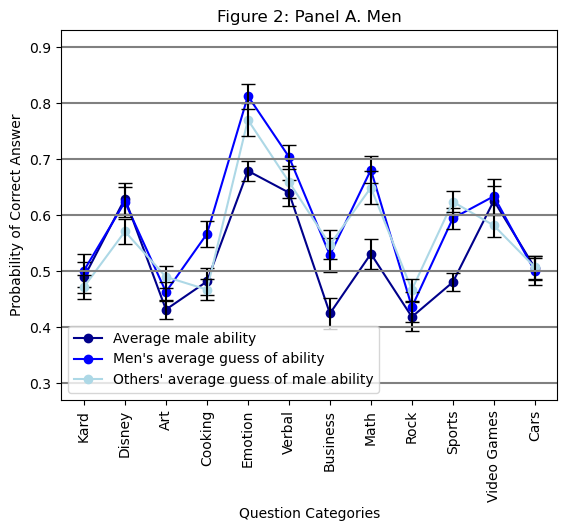

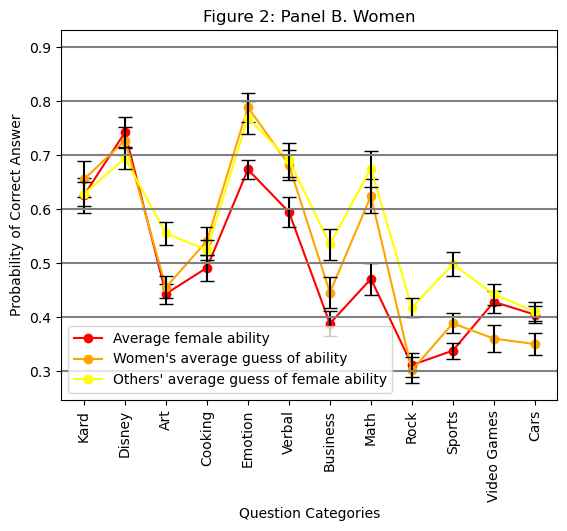

In [6]:
#Figure 2:
##This figure contrasts the true ability of a gender, with the believed
##ability of that gender on themselves, and what other's believe of the gender's ability.


###Both Figure 2.A and 2.B are the same in the paper and replication, including the confidence intervals.

#Panel A: Male

#Plotline for for Average male ability, with confidence intervals underneath
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y1 = [mean_kard_abi, mean_dis_abi, mean_art_abi,mean_cook_abi, mean_emo_abi, mean_verbal_abi,mean_bus_abi, mean_math_abi,
      mean_rock_abi,mean_sports_abi, mean_vg_abi,mean_cars_abi]
ci_avg_mabi = [ci_kard_abi_m, ci_dis_abi_m, ci_art_abi_m, ci_cook_abi_m, ci_emo_abi_m, ci_verbal_abi_m, ci_bus_abi_m,
               ci_math_abi_m, ci_rock_abi_m, ci_sports_abi_m, ci_vg_abi_m, ci_cars_abi_m]

#Plotline for Men's average guess of ability, with confidence itntervals.
x2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y2 = [mean_kard_self, mean_dis_self, mean_art_self, mean_cook_self, mean_emo_self, mean_verbal_self, mean_bus_self, mean_math_self,
      mean_rock_self, mean_sports_self, mean_vg_self, mean_cars_self]
ci_avg_mself = [ci_kard_self_m, ci_dis_self_m, ci_art_self_m, ci_cook_self_m, ci_emo_self_m, ci_verbal_self_m, ci_bus_self_m,
               ci_math_self_m, ci_rock_self_m, ci_sports_self_m, ci_vg_self_m, ci_cars_self_m]

#Plotline for Others' average guess of male ability, with confidence intervals underneath
x3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y3 = [mean_kard_part, mean_dis_part, mean_art_part, mean_cook_part, mean_emo_part, mean_verbal_part, mean_bus_part,
     mean_math_part, mean_rock_part, mean_sports_part, mean_vg_part, mean_cars_part]
ci_avg_mpart = [ci_kard_part_m, ci_dis_part_m, ci_art_part_m, ci_cook_part_m, ci_emo_part_m, ci_verbal_part_m, ci_bus_part_m,
               ci_math_part_m, ci_rock_part_m, ci_sports_part_m, ci_vg_part_m, ci_cars_part_m]

plt.plot(x1, y1, marker="o", color= "darkblue", label="Average male ability")
plt.errorbar(x1, y1, yerr = ci_avg_mabi,fmt="none", ecolor="black", capsize=5)
plt.plot(x2, y2, marker="o", color= "blue", label="Men's average guess of ability")
plt.errorbar(x2, y2, yerr = ci_avg_mself, fmt="none", ecolor="black", capsize=5)
plt.plot(x3, y3, marker="o", color= "lightblue", label="Others' average guess of male ability")
plt.errorbar(x3, y3, yerr = ci_avg_mpart, fmt="none", ecolor="black", capsize=5)

#Labels regarding type of question
x_labels = [f"Kard", f"Disney", f"Art", f"Cooking", f"Emotion", f"Verbal", f"Business", f"Math", f"Rock", f"Sports",f"Video Games", f"Cars"]

plt.xticks(x1, x_labels, rotation = "vertical")
plt.axhline(y=.3, color="grey", linestyle="-")
plt.axhline(y=.4, color="grey", linestyle="-")
plt.axhline(y=.5, color="grey", linestyle="-")
plt.axhline(y=.6, color="grey", linestyle="-")
plt.axhline(y=.7, color="grey", linestyle="-")
plt.axhline(y=.8, color="grey", linestyle="-")
plt.axhline(y=.9, color="grey", linestyle="-")


plt.xlabel("Question Categories")
plt.ylabel("Probability of Correct Answer")
plt.title("Figure 2: Panel A. Men")
               
plt.legend()
plt.show()

#Panel B. Women

#Plotline for for Average female ability, with confidence intervals underneath
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y1 = [mean_kard_abi_f, mean_dis_abi_f, mean_art_abi_f, mean_cook_abi_f, mean_emo_abi_f, mean_verbal_abi_f, mean_bus_abi_f, mean_math_abi_f,
      mean_rock_abi_f, mean_sports_abi_f, mean_vg_abi_f, mean_cars_abi_f]
ci_avg_fabi = [ci_kard_abi_f, ci_dis_abi_f, ci_art_abi_f, ci_cook_abi_f, ci_emo_abi_f, ci_verbal_abi_f, ci_bus_abi_f,
               ci_math_abi_f, ci_rock_abi_f, ci_sports_abi_f, ci_vg_abi_f, ci_cars_abi_f]

#Plotline for Women's average guess of ability, with confidence itntervals.
x2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y2 = [mean_kard_self_f, mean_dis_self_f, mean_art_self_f, mean_cook_self_f, mean_emo_self_f, mean_verbal_self_f, mean_bus_self_f, mean_math_self_f,
      mean_rock_self_f, mean_sports_self_f, mean_vg_self_f, mean_cars_self_f]
ci_avg_fself = [ci_kard_self_f, ci_dis_self_f, ci_art_self_f, ci_cook_self_f, ci_emo_self_f, ci_verbal_self_f, ci_bus_self_f,
               ci_math_self_f, ci_rock_self_f, ci_sports_self_f, ci_vg_self_f, ci_cars_self_f]

#Plotline for Others' average guess of female ability, with confidence intervals underneath
x3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y3 = [mean_kard_part_f, mean_dis_part_f, mean_art_part_f, mean_cook_part_f, mean_emo_part_f, mean_verbal_part_f, mean_bus_part_f,
     mean_math_part_f, mean_rock_part_f, mean_sports_part_f, mean_vg_part_f, mean_cars_part_f]
ci_avg_fpart = [ci_kard_part_f, ci_dis_part_f, ci_art_part_f, ci_cook_part_f, ci_emo_part_f, ci_verbal_part_f, ci_bus_part_f,
               ci_math_part_f, ci_rock_part_f, ci_sports_part_f, ci_vg_part_f, ci_cars_part_f]


plt.plot(x1, y1, marker="o", color= "red", label="Average female ability")
plt.errorbar(x1, y1, yerr = ci_avg_fabi, fmt="none", ecolor="black", capsize=5)
plt.plot(x2, y2, marker="o", color= "orange", label="Women's average guess of ability")
plt.errorbar(x2, y2, yerr = ci_avg_fself, fmt="none", ecolor="black", capsize=5)
plt.plot(x3, y3, marker="o", color= "yellow", label="Others' average guess of female ability")
plt.errorbar(x3, y3, yerr = ci_avg_fpart, fmt="none", ecolor="black", capsize=5)

#Labels regarding type of question
x_labels = [f"Kard", f"Disney", f"Art", f"Cooking", f"Emotion", f"Verbal", f"Business", f"Math", f"Rock", f"Sports",f"Video Games", f"Cars"]

plt.xticks(x1, x_labels, rotation = "vertical")
plt.axhline(y=.3, color="grey", linestyle="-")
plt.axhline(y=.4, color="grey", linestyle="-")
plt.axhline(y=.5, color="grey", linestyle="-")
plt.axhline(y=.6, color="grey", linestyle="-")
plt.axhline(y=.7, color="grey", linestyle="-")
plt.axhline(y=.8, color="grey", linestyle="-")
plt.axhline(y=.9, color="grey", linestyle="-")


plt.xlabel("Question Categories")
plt.ylabel("Probability of Correct Answer")
plt.title("Figure 2: Panel B. Women")


plt.legend()
plt.show()


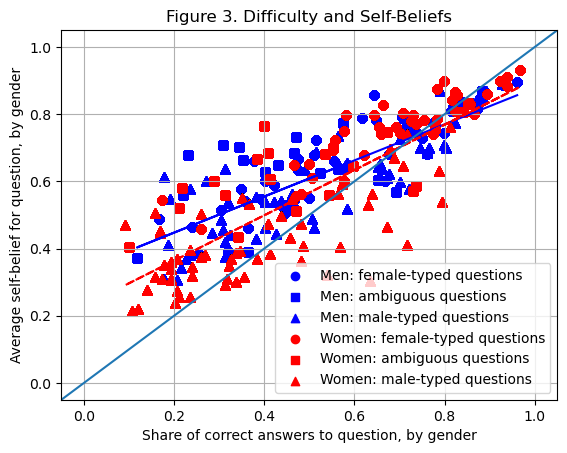

In [7]:
#Figure 3:
##This figure plots the average self-belief for each particular question, taking into account gender,
##against the average share of correct answers to that question, taking into account gender.
##Questions are also grouped depending on their gender type, Kardashians and Disney being female-typed, whilst
##Emotions, Art, Verbal, Cooking and Business being ambiguous, and Math, Sports and Video Games being male-typed.

###The replicated graph is the same as the one in the paper, including the fitted regressed lines for both genders.


#All the responses in the study are divided by question-type, whilst also dividing by gender.

index=QL

a_men_f = index.loc[(index["use"]==1) & (index["female"]==0) & ((index["kard"]==1)|(index["dis"]==1)), "easiness_g"]
e_men_f = index.loc[(index["use"]==1) & (index["female"]==0) & ((index["kard"]==1)|(index["dis"]==1)), "avgqnbelief_g"]

a_men_am = index.loc[(index["use"]==1) & (index["female"]==0) & ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "easiness_g"]
e_men_am = index.loc[(index["use"]==1) & (index["female"]==0) & ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "avgqnbelief_g"]

a_men_m = index.loc[(index["use"]==1) & (index["female"]==0) & ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "easiness_g"]
e_men_m = index.loc[(index["use"]==1) & (index["female"]==0) & ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "avgqnbelief_g"]

a_fem_f = index.loc[(index["use"]==1) & (index["female"]==1) & ((index["kard"]==1)|(index["dis"]==1)), "easiness_g"]
e_fem_f = index.loc[(index["use"]==1) & (index["female"]==1) & ((index["kard"]==1)|(index["dis"]==1)), "avgqnbelief_g"]

a_fem_am = index.loc[(index["use"]==1) & (index["female"]==1) & ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "easiness_g"]
e_fem_am = index.loc[(index["use"]==1) & (index["female"]==1) & ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "avgqnbelief_g"]

a_fem_m = index.loc[(index["use"]==1) & (index["female"]==1) & ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "easiness_g"]
e_fem_m = index.loc[(index["use"]==1) & (index["female"]==1) & ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "avgqnbelief_g"]




men_index = index.loc[(index["use"]==1) & (index["female"]==0) & ((index["kard"]==1)|(index["dis"]==1)|(index["verbal"]==1)|(index["art"]==1)|
                                                                  (index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)|(index["math"]==1)|
                                                                  (index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1))
                      , ["easiness_g", "avgqnbelief_g"]]

women_index = index.loc[(index["use"]==1) & (index["female"]==1) & ((index["kard"]==1)|(index["dis"]==1)|(index["verbal"]==1)|(index["art"]==1)|
                                                                  (index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)|(index["math"]==1)|
                                                                  (index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1))
                      , ["easiness_g", "avgqnbelief_g"]]

men_index = men_index.dropna(subset=["avgqnbelief_g"])

women_index = women_index.dropna(subset=["avgqnbelief_g"])


#Regressed fitted line for males between Average Self-Belief by Question and Average correct answers for that same questions.
z = np.polyfit(men_index["easiness_g"], men_index["avgqnbelief_g"], 1)
p = np.poly1d(z)

plt.plot(men_index["easiness_g"], p(men_index["easiness_g"]),"blue")


#Regressed fitted line for females between Average Self-Belief by Question and Average correct answers for that same questions.
z = np.polyfit(women_index["easiness_g"], women_index["avgqnbelief_g"], 1)
p = np.poly1d(z)

plt.plot(women_index["easiness_g"], p(women_index["easiness_g"]),"r--")

plt.scatter(a_men_f, e_men_f, color='blue', marker="o", label="Men: female-typed questions")
plt.scatter(a_men_am, e_men_am, color='blue', marker="s", label="Men: ambiguous questions")
plt.scatter(a_men_m, e_men_m, color='blue', marker="^", label="Men: male-typed questions")

plt.scatter(a_fem_f, e_fem_f, color='red', marker="o", label="Women: female-typed questions")
plt.scatter(a_fem_am, e_fem_am, color='red', marker="s", label="Women: ambiguous questions")
plt.scatter(a_fem_m, e_fem_m, color='red', marker="^", label="Women: male-typed questions")

#Reference line
plt.axline([0, 0], [1, 1])
plt.xlabel("Share of correct answers to question, by gender")
plt.ylabel("Average self-belief for question, by gender")
plt.title("Figure 3. Difficulty and Self-Beliefs")
plt.legend()

plt.grid()
plt.show()



In [8]:
#Table 2
##The table shows the average male advantage between the different type of questions, on both Bank 1 and Bank 2 questions.
##The average male advatage is also calculated using both banks togethers, whilest also checking the probability that
##the average advantage on both banks would be equal to 0.

###The results for this table match the results in the paper's.

#Function that finds the mean of correct answers for each gender and then finds the difference.
#Finals values are divided by 10 as the variable "Scorebank 1" was on a 0-10 scale, but we are looking at
#the probabilit of answering right, so we have to convert it to 0-1.

def mean_dif(sample1, sample2):
    
    meandifference = (sample1.mean() - sample2.mean())/10
    
    return meandifference

#Function that finds the standard error of the mean differences. Again, dividing by 10 to scale.

def std_error(sample1, sample2):
    
    n1 = len(sample1)
    n2 = len(sample2)
    
    s1 = np.std(sample1, ddof=1)
    s2 = np.std(sample2, ddof=1)
    
    std_error = np.sqrt((s1**2 / n1) + (s2**2 / n2))/10
    
    return std_error
    

#Bank 1, with standard errors
bank1_kard_male = QL.loc[(QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 0) & (QL["question"]==1), "scorebank1"]
bank1_kard_fem = QL.loc[(QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 1) & (QL["question"]==1), "scorebank1"]
dif_b1_k = mean_dif(bank1_kard_male, bank1_kard_fem)
std_b1_k = std_error(bank1_kard_male, bank1_kard_fem)

bank1_dis_male = QL.loc[(QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 0) & (QL["question"]==11), "scorebank1"]
bank1_dis_fem = QL.loc[(QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 1) & (QL["question"]==11), "scorebank1"]
dif_b1_d = mean_dif(bank1_dis_male, bank1_dis_fem)
std_b1_d = std_error(bank1_dis_male, bank1_dis_fem)

bank1_art_male = QL.loc[(QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 0) & (QL["question"]==-1), "scorebank1"]
bank1_art_fem = QL.loc[(QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 1) & (QL["question"]==-1), "scorebank1"]
dif_b1_a = mean_dif(bank1_art_male, bank1_art_fem)
std_b1_a = std_error(bank1_art_male, bank1_art_fem)

bank1_cook_male = QL.loc[(QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 0) & (QL["question"]==21), "scorebank1"]
bank1_cook_fem = QL.loc[(QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 1) & (QL["question"]==21), "scorebank1"]
dif_b1_c = mean_dif(bank1_cook_male, bank1_cook_fem)
std_b1_c = std_error(bank1_cook_male, bank1_cook_fem)

bank1_emo_male = QL.loc[(QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 0) & (QL["question"]==-131), "scorebank1"]
bank1_emo_fem = QL.loc[(QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 1) & (QL["question"]==-131), "scorebank1"]
dif_b1_e = mean_dif(bank1_emo_male, bank1_emo_fem)
std_b1_e = std_error(bank1_emo_male, bank1_emo_fem)

bank1_bus_male = QL.loc[(QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 0) & (QL["question"]==-121), "scorebank1"]
bank1_bus_fem = QL.loc[(QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 1) & (QL["question"]==-121), "scorebank1"]
dif_b1_b = mean_dif(bank1_bus_male, bank1_bus_fem)
std_b1_b = std_error(bank1_bus_male, bank1_bus_fem)

bank1_ver_male = QL.loc[(QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 0) & (QL["question"]==-31), "scorebank1"]
bank1_ver_fem = QL.loc[(QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 1) & (QL["question"]==-31), "scorebank1"]
dif_b1_v = mean_dif(bank1_ver_male, bank1_ver_fem)
std_b1_v = std_error(bank1_ver_male, bank1_ver_fem)

bank1_math_male = QL.loc[(QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 0) & (QL["question"]==-21), "scorebank1"]
bank1_math_fem = QL.loc[(QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 1) & (QL["question"]==-21), "scorebank1"]
dif_b1_m = mean_dif(bank1_math_male, bank1_math_fem)
std_b1_m = std_error(bank1_math_male, bank1_math_fem)

bank1_cars_male = QL.loc[(QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 0) & (QL["question"]==41), "scorebank1"]
bank1_cars_fem = QL.loc[(QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 1) & (QL["question"]==41), "scorebank1"]
dif_b1_ca = mean_dif(bank1_cars_male, bank1_cars_fem)
std_b1_ca = std_error(bank1_cars_male, bank1_cars_fem)

bank1_rock_male = QL.loc[(QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 0) & (QL["question"]==51), "scorebank1"]
bank1_rock_fem = QL.loc[(QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 1) & (QL["question"]==51), "scorebank1"]
dif_b1_r = mean_dif(bank1_rock_male, bank1_rock_fem)
std_b1_r = std_error(bank1_rock_male, bank1_rock_fem)

bank1_sports_male = QL.loc[(QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 0) & (QL["question"]==-11), "scorebank1"]
bank1_sports_fem = QL.loc[(QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 1) & (QL["question"]==-11), "scorebank1"]
dif_b1_s = mean_dif(bank1_sports_male, bank1_sports_fem)
std_b1_s = std_error(bank1_sports_male, bank1_sports_fem)

bank1_vg_male = QL.loc[(QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 0) & (QL["question"]==31), "scorebank1"]
bank1_vg_fem = QL.loc[(QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 1) & (QL["question"]==31), "scorebank1"]
dif_b1_vg = mean_dif(bank1_vg_male, bank1_vg_fem)
std_b1_vg = std_error(bank1_vg_male, bank1_vg_fem)


#Bank 2, with standard errors
bank2_kard_male = QL.loc[(QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 0) & (QL["question"]==1), "scorebank2"]
bank2_kard_fem = QL.loc[(QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 1) & (QL["question"]==1), "scorebank2"]
dif_b2_k = mean_dif(bank2_kard_male, bank2_kard_fem)
std_b2_k = std_error(bank2_kard_male, bank2_kard_fem)

bank2_dis_male = QL.loc[(QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 0) & (QL["question"]==11), "scorebank2"]
bank2_dis_fem = QL.loc[(QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 1) & (QL["question"]==11), "scorebank2"]
dif_b2_d = mean_dif(bank2_dis_male, bank2_dis_fem)
std_b2_d = std_error(bank2_dis_male, bank2_dis_fem)

bank2_art_male = QL.loc[(QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 0) & (QL["question"]==-1), "scorebank2"]
bank2_art_fem = QL.loc[(QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 1) & (QL["question"]==-1), "scorebank2"]
dif_b2_a = mean_dif(bank2_art_male, bank2_art_fem)
std_b2_a = std_error(bank2_art_male, bank2_art_fem)

bank2_cook_male = QL.loc[(QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 0) & (QL["question"]==21), "scorebank2"]
bank2_cook_fem = QL.loc[(QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 1) & (QL["question"]==21), "scorebank2"]
dif_b2_c = mean_dif(bank2_cook_male, bank2_cook_fem)
std_b2_c = std_error(bank2_cook_male, bank2_cook_fem)

bank2_emo_male = QL.loc[(QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 0) & (QL["question"]==-131), "scorebank2"]
bank2_emo_fem = QL.loc[(QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 1) & (QL["question"]==-131), "scorebank2"]
dif_b2_e = mean_dif(bank2_emo_male, bank2_emo_fem)
std_b2_e = std_error(bank2_emo_male, bank2_emo_fem)

bank2_bus_male = QL.loc[(QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 0) & (QL["question"]==-121), "scorebank2"]
bank2_bus_fem = QL.loc[(QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 1) & (QL["question"]==-121), "scorebank2"]
dif_b2_b = mean_dif(bank2_bus_male, bank2_bus_fem)
std_b2_b = std_error(bank2_bus_male, bank2_bus_fem)

bank2_ver_male = QL.loc[(QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 0) & (QL["question"]==-31), "scorebank2"]
bank2_ver_fem = QL.loc[(QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 1) & (QL["question"]==-31), "scorebank2"]
dif_b2_v = mean_dif(bank2_ver_male, bank2_ver_fem)
std_b2_v = std_error(bank2_ver_male, bank2_ver_fem)

bank2_math_male = QL.loc[(QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 0) & (QL["question"]==-21), "scorebank2"]
bank2_math_fem = QL.loc[(QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 1) & (QL["question"]==-21), "scorebank2"]
dif_b2_m = mean_dif(bank2_math_male, bank2_math_fem)
std_b2_m = std_error(bank2_math_male, bank2_math_fem)

bank2_cars_male = QL.loc[(QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 0) & (QL["question"]==41), "scorebank2"]
bank2_cars_fem = QL.loc[(QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 1) & (QL["question"]==41), "scorebank2"]
dif_b2_ca = mean_dif(bank2_cars_male, bank2_cars_fem)
std_b2_ca = std_error(bank2_cars_male, bank2_cars_fem)

bank2_rock_male = QL.loc[(QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 0) & (QL["question"]==51), "scorebank2"]
bank2_rock_fem = QL.loc[(QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 1) & (QL["question"]==51), "scorebank2"]
dif_b2_r = mean_dif(bank2_rock_male, bank2_rock_fem)
std_b2_r = std_error(bank2_rock_male, bank2_rock_fem)

bank2_sports_male = QL.loc[(QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 0) & (QL["question"]==-11), "scorebank2"]
bank2_sports_fem = QL.loc[(QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 1) & (QL["question"]==-11), "scorebank2"]
dif_b2_s = mean_dif(bank2_sports_male, bank2_sports_fem)
std_b2_s = std_error(bank2_sports_male, bank2_sports_fem)

bank2_vg_male = QL.loc[(QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 0) & (QL["question"]==31), "scorebank2"]
bank2_vg_fem = QL.loc[(QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 1) & (QL["question"]==31), "scorebank2"]
dif_b2_vg = mean_dif(bank2_vg_male, bank2_vg_fem)
std_b2_vg = std_error(bank2_vg_male, bank2_vg_fem)


#Both Banks, with standard errors, and using a permetutation test to find the probability that the average male advantage in both banks is 0
both_kard_male = QL.loc[(QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 0) & (QL["question"]==1), "avgability"]
both_kard_fem = QL.loc[(QL["use"] == 1) & (QL["kard"] == 1) & (QL["female"] == 1) & (QL["question"]==1), "avgability"]
dif_bo_k = mean_dif(both_kard_male, both_kard_fem)
std_bo_k = std_error(both_kard_male, both_kard_fem)
p_kard = stats.permutation_test((both_kard_male, both_kard_fem), mean_dif, n_resamples=50000, random_state=30)

both_dis_male = QL.loc[(QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 0) & (QL["question"]==11), "avgability"]
both_dis_fem = QL.loc[(QL["use"] == 1) & (QL["dis"] == 1) & (QL["female"] == 1) & (QL["question"]==11), "avgability"]
dif_bo_d = mean_dif(both_dis_male, both_dis_fem)
std_bo_d = std_error(both_dis_male, both_dis_fem)
p_dis = stats.permutation_test((both_dis_male, both_dis_fem), mean_dif, n_resamples=50000, random_state=30)

both_art_male = QL.loc[(QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 0) & (QL["question"]==-1), "avgability"]
both_art_fem = QL.loc[(QL["use"] == 1) & (QL["art"] == 1) & (QL["female"] == 1) & (QL["question"]==-1), "avgability"]
dif_bo_a = mean_dif(both_art_male, both_art_fem)
std_bo_a = std_error(both_art_male, both_art_fem)
p_art = stats.permutation_test((both_art_male, both_art_fem), mean_dif, n_resamples=50000, random_state=30)

both_cook_male = QL.loc[(QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 0) & (QL["question"]==21), "avgability"]
both_cook_fem = QL.loc[(QL["use"] == 1) & (QL["cook"] == 1) & (QL["female"] == 1) & (QL["question"]==21), "avgability"]
dif_bo_c = mean_dif(both_cook_male, both_cook_fem)
std_bo_c = std_error(both_cook_male, both_cook_fem)
p_cook = stats.permutation_test((both_cook_male, both_cook_fem), mean_dif, n_resamples=50000, random_state=30)

both_emo_male = QL.loc[(QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 0) & (QL["question"]==-131), "avgability"]
both_emo_fem = QL.loc[(QL["use"] == 1) & (QL["emo"] == 1) & (QL["female"] == 1) & (QL["question"]==-131), "avgability"]
dif_bo_e = mean_dif(both_emo_male, both_emo_fem)
std_bo_e = std_error(both_emo_male, both_emo_fem)
p_emo = stats.permutation_test((both_emo_male, both_emo_fem), mean_dif, n_resamples=50000, random_state=30)

both_bus_male = QL.loc[(QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 0) & (QL["question"]==-121), "avgability"]
both_bus_fem = QL.loc[(QL["use"] == 1) & (QL["bus"] == 1) & (QL["female"] == 1) & (QL["question"]==-121), "avgability"]
dif_bo_b = mean_dif(both_bus_male, both_bus_fem)
std_bo_b = std_error(both_bus_male, both_bus_fem)
p_bus = stats.permutation_test((both_bus_male, both_bus_fem), mean_dif, n_resamples=50000, random_state=30)

both_ver_male = QL.loc[(QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 0) & (QL["question"]==-31), "avgability"]
both_ver_fem = QL.loc[(QL["use"] == 1) & (QL["verbal"] == 1) & (QL["female"] == 1) & (QL["question"]==-31), "avgability"]
dif_bo_v = mean_dif(both_ver_male, both_ver_fem)
std_bo_v = std_error(both_ver_male, both_ver_fem)
p_ver = stats.permutation_test((both_ver_male, both_ver_fem), mean_dif, n_resamples=50000, random_state=30)

both_math_male = QL.loc[(QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 0) & (QL["question"]==-21), "avgability"]
both_math_fem = QL.loc[(QL["use"] == 1) & (QL["math"] == 1) & (QL["female"] == 1) & (QL["question"]==-21), "avgability"]
dif_bo_m = mean_dif(both_math_male, both_math_fem)
std_bo_m = std_error(both_math_male, both_math_fem)
p_math = stats.permutation_test((both_math_male, both_math_fem), mean_dif, n_resamples=50000, random_state=30)

both_cars_male = QL.loc[(QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 0) & (QL["question"]==41), "avgability"]
both_cars_fem = QL.loc[(QL["use"] == 1) & (QL["cars"] == 1) & (QL["female"] == 1) & (QL["question"]==41), "avgability"]
dif_bo_ca = mean_dif(both_cars_male, both_cars_fem)
std_bo_ca = std_error(both_cars_male, both_cars_fem)
p_cars = stats.permutation_test((both_cars_male, both_cars_fem), mean_dif, n_resamples=50000, random_state=30)

both_rock_male = QL.loc[(QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 0) & (QL["question"]==51), "avgability"]
both_rock_fem = QL.loc[(QL["use"] == 1) & (QL["rock"] == 1) & (QL["female"] == 1) & (QL["question"]==51), "avgability"]
dif_bo_r = mean_dif(both_rock_male, both_rock_fem)
std_bo_r = std_error(both_rock_male, both_rock_fem)
p_rock = stats.permutation_test((both_rock_male, both_rock_fem), mean_dif, n_resamples=50000, random_state=30)

both_sports_male = QL.loc[(QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 0) & (QL["question"]==-11), "avgability"]
both_sports_fem = QL.loc[(QL["use"] == 1) & (QL["sports"] == 1) & (QL["female"] == 1) & (QL["question"]==-11), "avgability"]
dif_bo_s = mean_dif(both_sports_male, both_sports_fem)
std_bo_s = std_error(both_sports_male, both_sports_fem)
p_sports = stats.permutation_test((both_sports_male, both_sports_fem), mean_dif, n_resamples=50000, random_state=30)

both_vg_male = QL.loc[(QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 0) & (QL["question"]==31), "avgability"]
both_vg_fem = QL.loc[(QL["use"] == 1) & (QL["vg"] == 1) & (QL["female"] == 1) & (QL["question"]==31), "avgability"]
dif_bo_vg = mean_dif(both_vg_male, both_vg_fem)
std_bo_vg = std_error(both_vg_male, both_vg_fem)
p_vg = stats.permutation_test((both_vg_male, both_vg_fem), mean_dif, n_resamples=50000, random_state=30)


data_t_2 = {"Avg gap on bank 1":[dif_b1_k , std_b1_k, dif_b1_d, std_b1_d, dif_b1_a, std_b1_a,
                                 dif_b1_c, std_b1_c, dif_b1_e, std_b1_e, dif_b1_b, std_b1_b,
                                 dif_b1_v, std_b1_v, dif_b1_m, std_b1_m, dif_b1_ca, std_b1_ca,
                                 dif_b1_r, std_b1_r, dif_b1_s, std_b1_s, dif_b1_vg, std_b1_vg],
            "Avg gap on bank 2":[dif_b2_k, std_b2_k, dif_b2_d, std_b2_d, dif_b2_a, std_b2_a,
                                 dif_b2_c, std_b2_c, dif_b2_e, std_b2_e, dif_b2_b, std_b2_b,
                                 dif_b2_v, std_b2_v, dif_b2_m, std_b2_m, dif_b2_ca, std_b2_ca,
                                 dif_b2_r, std_b2_r, dif_b2_s, std_b2_s, dif_b2_vg, std_b2_vg], 
            "Avg gap on both banks":[dif_bo_k*10, std_bo_k*10, dif_bo_d*10, std_bo_d*10, dif_bo_a*10, std_bo_a*10,
                                 dif_bo_c*10, std_bo_c*10, dif_bo_e*10, std_bo_e*10, dif_bo_b*10, std_bo_b*10,
                                 dif_bo_v*10, std_bo_v*10, dif_bo_m*10, std_bo_m*10, dif_bo_ca*10, std_bo_ca*10,
                                 dif_bo_r*10, std_bo_r*10, dif_bo_s*10, std_bo_s*10, dif_bo_vg*10, std_bo_vg*10], 
            "p-value (avg gap on both banks =0)":[p_kard.pvalue, "", p_dis.pvalue, "",p_art.pvalue, "",p_cook.pvalue, "",p_emo.pvalue, "",p_bus.pvalue, "",p_ver.pvalue,
                                                  "",p_math.pvalue, "",p_cars.pvalue, "",p_rock.pvalue, "",p_sports.pvalue, "",p_vg.pvalue, ""]}

Table_2 = pd.DataFrame(data_t_2, index =["Kardashians","", "Disney Movies", " ","Art"," ", "Cooking", " ", "Emotion recognition", 
                                         " ", "Business", " ", "Verbal skills", " ", "Math", " ", "Cars", " ", "Rock and roll",
                                        " ", "Sports and games", " ", "Video Games", " "]) 

print("                    Male advantage in prob. of correct answer at question-level")

print("                    --------------------------------------------------------------------------------------------------------------------")





print(Table_2)






                    Male advantage in prob. of correct answer at question-level
                    --------------------------------------------------------------------------------------------------------------------
                     Avg gap on bank 1  Avg gap on bank 2  \
Kardashians                  -0.105468          -0.168533   
                              0.021258           0.024335   
Disney Movies                -0.141629          -0.083682   
                              0.022212           0.020568   
Art                           0.001666          -0.025990   
                              0.015879           0.013814   
Cooking                       0.002064          -0.022492   
                              0.020083           0.018751   
Emotion recognition           0.024219          -0.013180   
                              0.015872           0.016951   
Business                      0.079259          -0.007434   
                              0.022078           0.

In [9]:
#Table 3: Self-Beliefs

###Even when clustering at the individual level using the variable "id",
###the estimations for the variables for equation 5, both male and female, are signifcantly off.
###Regardless of that, in equation 6, I don't specify that I want to cluster at the individual level
###when running the regression and the estimations still work.

print("            Table 3-Self-Beliefs")



print("Question-level self-beliefs: equation (5)")
print("Two-stage least squares predicting own believed probability of answering a question correctly")


####### Equation 5: Male
######We used a Two_Stage_Least_Squares regression as the variable "Own Ability" in this equation
######is an imperfect measure for the probability that someone gets an answer correct, as it is just
######a dummy varibale indicating if someone got the answer correct or not. Thus, we estimate the value of 
######"qncorrect" with the average frequency of a correct answer to the question (scorebank_qn_minusj) and average ability in 
######the rest of the bank excluding that question (easiness_minusi).
#####


index = QL[QL["sbelief"].notnull()]

index_m = index.loc[(index["female"]==0) & (index["use"]==1)]


y= index_m.loc[(index_m["female"]==0) & (index_m["use"]==1),"sbelief"]


qncorrect= index_m.loc[(index_m["female"]==0) & (index_m["use"]==1),"qncorrect"]

x = (index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) ,"easiness_minusi"] + 
    index_m.loc[(index_m["female"]==0) & (index_m["use"]==1),"scorebank_qn_minusj"])

gadvbank_qn = (index_m.loc[(index_m["female"]==0) & (index_m["use"]==1),"gadvbank_qn"])

formula= "y ~ 1 + gadvbank_qn + [qncorrect ~ x]"

mod_eq5_male= IV2SLS.from_formula(formula, index_m).fit(cov_type="clustered", clusters=index_m["id"], debiased=True)

results = pd.concat([mod_eq5_male.params, mod_eq5_male.std_errors], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","gadvbank_qn":"Own Gender Advantage","qncorrect":"Own Ability"}
results.rename(index= row_labels, inplace=True)
print("Male:")
print(results)
print("Observations" + (" ")*30 + str(len(index_m)))

####### Equation 5: Female
######
#####
index_f = index.loc[(index["female"]==1) & (index["use"]==1)]

y= index_f.loc[(index_f["female"]==1) & (index_f["use"]==1),"sbelief"]

qncorrect= index_f.loc[(index_f["female"]==1) & (index_f["use"]==1),"qncorrect"]

x = (index.loc[(index["female"]==1) & (index["use"]==1) ,"easiness_minusi"] + 
    index.loc[(index["female"]==1) & (index["use"]==1),"scorebank_qn_minusj"])

gadvbank_qn = (index.loc[(index["female"]==1) & (index["use"]==1),"gadvbank_qn"])

formula= "y ~ 1 + gadvbank_qn + [qncorrect ~ x]"

mod_eq5_female= IV2SLS.from_formula(formula, index_f).fit(cov_type="clustered", clusters=index_f["id"], debiased=True)

results = pd.concat([mod_eq5_female.params, mod_eq5_female.std_errors], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","gadvbank_qn":"Own Gender Advantage","qncorrect":"Own Ability"}
results.rename(index= row_labels, inplace=True)
print("")
print("Female:")
print(results)
print("Observations" + (" ")*30 + str(len(index_f)))

print("")
print("-"*60)

####################################################################################################

print("")
print("Bank-level self-beliefs: equation (6)")
print("OLS predicting own believed score in bank on scale of 0 to 1")

####### Equation 6: Male
######
#####

#This is one of the only instances in which we use Bank Level data instead of the Question Level dataset.
index = BL[BL["guess_s_bank"].notnull()]

index_m = index.loc[(index["female"]==0) & (index["use"]==1)]

y = index_m.loc[(index_m["female"]==0) & (index_m["use"]==1),"guess_s_bank"]

gadvbank = index_m.loc[(index_m["female"]==0) & (index_m["use"]==1),"gadvbank"]

scorebank = index_m.loc[(index_m["female"]==0) & (index_m["use"]==1),"scorebank"]

formula = "y ~ gadvbank + scorebank"

mod_eq6_male = smf.ols(formula=formula, data=index_m).fit()

results = pd.concat([mod_eq6_male.params, mod_eq6_male.bse], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","gadvbank":"Own Gender Advantage","scorebank":"Own ability"}
results.rename(index= row_labels, inplace=True)
print("Male:")
print(results)
print("Observations" + (" ")*30 + str(len(index_m)))


####### Equation 6: Female
######We used normal OLS regressions as no variable was conflictive.
#####

index_f = index.loc[(index["female"]==1) & (index["use"]==1)]

y = index_f.loc[(index_f["female"]==1) & (index_f["use"]==1),"guess_s_bank"]

gadvbank = index_f.loc[(index_f["female"]==1) & (index_f["use"]==1),"gadvbank"]

scorebank = index_f.loc[(index_f["female"]==1) & (index_f["use"]==1),"scorebank"]

formula = "y ~ gadvbank + scorebank"

mod_eq6_fem = smf.ols(formula=formula, data=index_f).fit()

results = pd.concat([mod_eq6_fem.params, mod_eq6_fem.bse], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","gadvbank":"Own Gender Advantage","scorebank":"Own ability"}
results.rename(index= row_labels, inplace=True)
print("")
print("Female:")
print(results)
print("Observations" + (" ")*30 + str(len(index_f)))



            Table 3-Self-Beliefs
Question-level self-beliefs: equation (5)
Two-stage least squares predicting own believed probability of answering a question correctly
Male:
                      Parameter Estimates  Standard Errors
Constant                         0.291971         0.010827
Own Gender Advantage            -0.049510         0.025600
Own Ability                      0.679474         0.014159
Observations                              23438

Female:
                      Parameter Estimates  Standard Errors
Constant                         0.263745         0.009937
Own Gender Advantage             0.435695         0.029225
Own Ability                      0.676532         0.013039
Observations                              21840

------------------------------------------------------------

Bank-level self-beliefs: equation (6)
OLS predicting own believed score in bank on scale of 0 to 1
Male:
                      Parameter Estimates  Standard Errors
Constant             

In [10]:
#Table 4: Beliefs about Others

##All estimations match the paper's regression results, expect their standard errors,
##even when clustering at the individual level (tried previously).

print("            Table 4-Beliefs about Others")

print("Question-level beliefs: equation (7)")
print("OLS predicting belief of partner’s probability of answering a question correctly")

####### Equation 7: Male
######OLS predicting belief of partner’s probability of answering a question correctly.
#####

index = QL[QL["pbelief"].notnull()]

index_m = index.loc[(index["p_female"]==0) & (index["use"]==1) & (index["pt3knewgender"]==1)]


y= index_m.loc[(index_m["p_female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"pbelief"]

p_easiness = index_m.loc[(index_m["p_female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"p_easiness_g"]

padvbank_qn = index_m.loc[(index_m["p_female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"padvbank_qn"]

formula= "y ~ p_easiness + padvbank_qn"

mod_eq7_male = smf.ols(formula=formula, data=index_m).fit()

results = pd.concat([mod_eq7_male.params, mod_eq7_male.bse], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"padvbank_qn":"Partner’s gender adv","p_easiness":"Partner ability","Intercept":"Constant"}
results.rename(index= row_labels, inplace=True)
print("Male:")
print(results)
print("Observations" + (" ")*30 + str(len(index_m)))

####### Equation 7: Female
######
#####

index_f = index.loc[(index["p_female"]==1) & (index["use"]==1) & (index["pt3knewgender"]==1)]


y= index_f.loc[(index_f["p_female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"pbelief"]

p_easiness = index_f.loc[(index_f["p_female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"p_easiness_g"]

padvbank_qn = index_f.loc[(index_f["p_female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"padvbank_qn"]

formula= "y ~ p_easiness + padvbank_qn"

mod_eq7_female = smf.ols(formula=formula, data=index_f).fit()

results = pd.concat([mod_eq7_female.params, mod_eq7_female.bse], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"padvbank_qn":"Partner’s gender adv","p_easiness":"Partner ability","Intercept":"Constant"}
results.rename(index= row_labels, inplace=True)
print("")
print("Female:")
print(results)
print("Observations" + (" ")*30 + str(len(index_f)))

print("")
print("-"*60)

####################################################################################################

print("")
print("Bank-level self-beliefs: equation (8)")
print("OLS predicting own believed score in bank on scale of 0 to 1")

####### Equation 8: Male
######OLS predicting own believed score in bank on scale of 0 to 1
#####

index = BL[BL["guess_p_bank"].notnull()]

index_m = index.loc[(index["p_female"]==0) & (index["use"]==1) & (index["knewgender_bank"]==1)]

y = index_m.loc[(index_m["p_female"]==0) & (index_m["use"]==1) & (index_m["knewgender_bank"]==1),"guess_p_bank"]

padvbank = index_m.loc[(index_m["p_female"]==0) & (index_m["use"]==1)  & (index_m["knewgender_bank"]==1),"padvbank"]

pavgscorebank = index_m.loc[(index_m["p_female"]==0) & (index_m["use"]==1)  & (index_m["knewgender_bank"]==1),"pavgscorebank"]

formula = "y ~ padvbank + pavgscorebank"

mod_eq8_male = smf.ols(formula=formula, data=index_m).fit()

results = pd.concat([mod_eq8_male.params, mod_eq8_male.bse], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","padvbank":"Partner’s gender advantage","pavgscorebank":"Partner ability"}
results.rename(index= row_labels, inplace=True)
print("Male:")
print(results)
print("Observations" + (" ")*30 + str(len(index_m)))


####### Equation 8: Female
######
#####

index_f = index.loc[(index["p_female"]==1) & (index["use"]==1) & (index["knewgender_bank"]==1)]

y = index_f.loc[(index_f["p_female"]==1) & (index_f["use"]==1) & (index_f["knewgender_bank"]==1),"guess_p_bank"]

padvbank = index_f.loc[(index_f["p_female"]==1) & (index_f["use"]==1) & (index_f["knewgender_bank"]==1),"padvbank"]

pavgscorebank = index_f.loc[(index_f["p_female"]==1) & (index_f["use"]==1) & (index_f["knewgender_bank"]==1),"pavgscorebank"]

formula = "y ~ padvbank + pavgscorebank"

mod_eq8_fem = smf.ols(formula=formula, data=index_f).fit()

results = pd.concat([mod_eq8_fem.params, mod_eq8_fem.bse], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","padvbank":"Partner’s gender advantage","pavgscorebank":"Partner ability"}
results.rename(index= row_labels, inplace=True)
print("")
print("Female:")
print(results)
print("Observations" + (" ")*30 + str(len(index_f)))



            Table 4-Beliefs about Others
Question-level beliefs: equation (7)
OLS predicting belief of partner’s probability of answering a question correctly
Male:
                      Parameter Estimates  Standard Errors
Constant                         0.396103         0.004456
Partner ability                  0.341509         0.008056
Partner’s gender adv             0.022509         0.016532
Observations                              18020

Female:
                      Parameter Estimates  Standard Errors
Constant                         0.432046         0.004385
Partner ability                  0.325453         0.008039
Partner’s gender adv             0.477667         0.017146
Observations                              18179

------------------------------------------------------------

Bank-level self-beliefs: equation (8)
OLS predicting own believed score in bank on scale of 0 to 1
Male:
                            Parameter Estimates  Standard Errors
Constant                 

In [11]:
#Table 5: Predicted Gender Gaps in Overconfidence

##POSSIBLE TAMPERING. FittedvalueM and F seem suspicious and it is not clarified
##where do they come from.
##Their definition in the Question Level excel with variable meanings are
##"Fitted value from first-stage regression of qncorrect on other 
##ability proxies, fitted just for men"

####### DIM-only prediction
######
#####

#print("DIM-only prediction of gender gap in overconfidence (M − F) (1)")

#QL["pred_maleqnselfbelief_DIMonly"] = (0.60*QL["fittedvalueM"])+.33

#QL["pred_femaleqnselfbelief_DIMonly"] = (0.61*QL["fittedvalueF"])+.30

#QL["DIMpred_selfqn"] = QL["predmaleqnselfbelief_DIMonly"]

#QL["DIMpred_selfqn"] = QL["pred_femaleqnselfbelief_DIMonly"]

#if QL["female"].any() == 1:
    #QL["DIMpred_selfqn"] = QL["pred_femaleqnselfbelief_DIMonly"]
    
    
#QL["dim_pred"] = QL["DIMpred_selfqn"] - QL["qncorrect"]


#y=ttest_ind(QL.loc[(QL["kard"]==0) & (QL["use"]==1)  & (QL["female"]==1),"dim_pred"],
          #QL.loc[(QL["kard"]==0) & (QL["use"]==1)  & (QL["female"]==0),"dim_pred"])

#x=ttest_ind(QL.loc[(QL["dis"]==0) & (QL["use"]==1)  & (QL["female"]==0),"dim_pred"],
          #QL.loc[(QL["dis"]==0) & (QL["use"]==1)  & (QL["female"]==1),"dim_pred"])

#print(y, x)

####### Equation 7: Male
######
#####

DIM-only prediction of gender gap in overconfidence (M − F) (1)


KeyError: 'predmaleqnselfbelief_DIMonly'

In [ ]:
#Table 6: Self-Beliefs with Context Dependence

##In the Two-stage Least Squares prediction, values for both men and women are erratic. Some estimations for variables are very
##similar while others are very far off. On the other hand, results for the normal OLS match the paper's.

print("       Table 6- Self-Beliefs with Context Dependence")

print("Question-level self-beliefs")
print("Two-stage least squares predicting own believed probability of answering a question correctly")

####### 2SLS predicting own believed probability of answering a question correctly: Male

index = QL[QL["sbelief"].notnull()]

index_m = index.loc[(index["female"]==0) & (index["use"]==1) & (index["pt3knewgender"]==1)]

y= index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"sbelief"]

qncorrect= index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"qncorrect"]

x = (index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"easiness_minusi"] + 
    index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"scorebank_qn_minusj"] +
    index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"gadvbank_qn"]) 

gadvbank_qn = (index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"gadvbank_qn"])

p_female = (index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"p_female"])

pfem_gadvbankqn = (index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["pt3knewgender"]==1),"pfem_gadvbankqn"])

formula= "y ~ 1 + p_female + gadvbank_qn + pfem_gadvbankqn + [qncorrect ~ x]"

mod_eq_male= IV2SLS.from_formula(formula, index_m).fit(cov_type="unadjusted", debiased=True)

results = pd.concat([mod_eq_male.params, mod_eq_male.std_errors], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","gadvbank_qn":"Own Gender Advantage","qncorrect":"Own Ability",
              "p_female":"Partner female","pfem_gadvbankqn":"Partner female × own gender advantage"}
results.rename(index= row_labels, inplace=True)
print("Male:")
print(results)

####### 2SLS predicting own believed probability of answering a question correctly: Female
######
#####
index = QL[QL["sbelief"].notnull()]

index_f = index.loc[(index["female"]==1) & (index["use"]==1) & (index["pt3knewgender"]==1)]

y= index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"sbelief"]

qncorrect= index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"qncorrect"]

x = (index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"easiness_minusi"] + 
    index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"scorebank_qn_minusj"] +
    index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"gadvbank_qn"]) 

gadvbank_qn = (index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"gadvbank_qn"])

p_female = (index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"p_female"])

pfem_gadvbankqn = (index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["pt3knewgender"]==1),"pfem_gadvbankqn"])

formula = "y ~ 1 + p_female + gadvbank_qn + pfem_gadvbankqn + [qncorrect ~ x]"

mod_eq_fem= IV2SLS.from_formula(formula, index_f).fit(cov_type="unadjusted", debiased=True)

results = pd.concat([mod_eq_fem.params, mod_eq_fem.std_errors], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","gadvbank_qn":"Own Gender Advantage","qncorrect":"Own Ability",
              "p_female":"Partner female","pfem_gadvbankqn":"Partner female × own gender advantage"}
results.rename(index= row_labels, inplace=True)
print("")
print("Female:")
print(results)

####################################################################################################

print("")
print("Bank-level self-belief")
print("OLS predicting own believed score in bank on scale of 0 to 1")

#######OLS predicting own believed score on 0 to 1 scale: Male
######
#####

index = BL[BL["guess_p_bank"].notnull()]

index_m = index.loc[(index["female"]==0) & (index["use"]==1) & (index["knewgender_bank"]==1)]

y = index_m.loc[(index_m["female"]==0) & (index_m["use"]==1) & (index_m["knewgender_bank"]==1),"guess_s_bank"]

gadvbank = index_m.loc[(index_m["female"]==0) & (index_m["use"]==1)  & (index_m["knewgender_bank"]==1),"gadvbank"]

scorebank = index_m.loc[(index_m["female"]==0) & (index_m["use"]==1)  & (index_m["knewgender_bank"]==1),"scorebank"]

p_female = index_m.loc[(index_m["female"]==0) & (index_m["use"]==1)  & (index_m["knewgender_bank"]==1),"p_female"]

pfem_gadvbank = index_m.loc[(index_m["female"]==0) & (index_m["use"]==1)  & (index_m["knewgender_bank"]==1),"pfem_gadvbank"]

formula = "y ~ gadvbank + scorebank + p_female + pfem_gadvbank"

mod_eq_male = smf.ols(formula=formula, data=index_m).fit()

results = pd.concat([mod_eq_male.params, mod_eq_male.bse], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","gadvbank":"Own Gender Advantage","scorebank":"Own ability",
              "p_female":"Partner female","pfem_gadvbank":"Partner female × own gender advantage"}
results.rename(index= row_labels, inplace=True)
print("Male:")
print(results)

#######OLS predicting own believed score on 0 to 1 scale: Female
######
#####

index = BL[BL["guess_p_bank"].notnull()]

index_f = index.loc[(index["female"]==1) & (index["use"]==1) & (index["knewgender_bank"]==1)]

y = index_f.loc[(index_f["female"]==1) & (index_f["use"]==1) & (index_f["knewgender_bank"]==1),"guess_s_bank"]

gadvbank = index_f.loc[(index_f["female"]==1) & (index_f["use"]==1)  & (index_f["knewgender_bank"]==1),"gadvbank"]

scorebank = index_f.loc[(index_f["female"]==1) & (index_f["use"]==1)  & (index_f["knewgender_bank"]==1),"scorebank"]

p_female = index_f.loc[(index_f["female"]==1) & (index_f["use"]==1)  & (index_f["knewgender_bank"]==1),"p_female"]

pfem_gadvbank = index_f.loc[(index_f["female"]==1) & (index_f["use"]==1)  & (index_f["knewgender_bank"]==1),"pfem_gadvbank"]

print(len(y))

formula = "y ~ gadvbank + scorebank + p_female + pfem_gadvbank"

mod_eq_fem = smf.ols(formula=formula, data=index_f).fit()

results = pd.concat([mod_eq_fem.params, mod_eq_fem.bse], axis=1)
results.columns = ["Parameter Estimates", "Standard Errors"]
row_labels = {"Intercept":"Constant","gadvbank":"Own Gender Advantage","scorebank":"Own ability",
              "p_female":"Partner female","pfem_gadvbank":"Partner female × own gender advantage"}
results.rename(index= row_labels, inplace=True)
print("")
print("Female:")
print(results)

In [ ]:
#Function to calculate the mean confidence interval
def calculate_mean_ci(data, alpha=0.05):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    
    t_statistic = stats.t.ppf(1 - alpha / 2, df=n - 1)
    margin_error = t_statistic * (std / np.sqrt(n))
    
    confidence_interval = ((mean - margin_error)-(mean + margin_error))/2
    
    return confidence_interval

#Function to calculate the confidence interval of the mean difference
    
def calculate_mean_difference_ci(data1, data2, alpha=0.05):
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    std1 = np.std(data1, ddof=1)
    std2 = np.std(data2, ddof=1)
    
    df = len(data1) + len(data2) - 2
    se = np.sqrt((std1**2 / len(data1)) + (std2**2 / len(data2)))
    t_statistic = (mean1 - mean2) / se
    margin_error = stats.t.ppf(1 - alpha / 2, df) * se
    confidence_interval = (((mean1 - mean2) - margin_error)-((mean1 - mean2) + margin_error))/2
    
    return confidence_interval

#Male parameters for Figure 4

#Men with male partners
men_kard_pmale = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["p_female"] == 0) & (QL["question"]==1) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_dis_pmale = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["p_female"] == 0) & (QL["question"]==11) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_art_pmale = (QL["use"] == 1) & (QL["art"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-1) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_cook_pmale = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["p_female"] == 0) & (QL["question"]==21) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_emo_pmale = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-131) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_verbal_pmale = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-31) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_bus_pmale = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-121) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_math_pmale = (QL["use"] == 1) & (QL["math"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-21) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_rock_pmale = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["p_female"] == 0) & (QL["question"]==51) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_sports_pmale = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-11) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_vg_pmale = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["p_female"] == 0) & (QL["question"]==31) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_cars_pmale = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["p_female"] == 0) & (QL["question"]==41) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)

#Mean of men with male partners
mean_kard_pmale = (QL.loc[men_kard_pmale, "comb_bel_rel_ability"].mean())
mean_dis_pmale = (QL.loc[men_dis_pmale, "comb_bel_rel_ability"].mean())
mean_art_pmale = (QL.loc[men_art_pmale, "comb_bel_rel_ability"].mean())
mean_cook_pmale = (QL.loc[men_cook_pmale, "comb_bel_rel_ability"].mean())
mean_emo_pmale = (QL.loc[men_emo_pmale, "comb_bel_rel_ability"].mean())
mean_verbal_pmale = (QL.loc[men_verbal_pmale, "comb_bel_rel_ability"].mean())
mean_bus_pmale = (QL.loc[men_bus_pmale, "comb_bel_rel_ability"].mean())
mean_math_pmale = (QL.loc[men_math_pmale, "comb_bel_rel_ability"].mean())
mean_rock_pmale = (QL.loc[men_rock_pmale, "comb_bel_rel_ability"].mean())
mean_sports_pmale = (QL.loc[men_sports_pmale, "comb_bel_rel_ability"].mean())
mean_vg_pmale = (QL.loc[men_vg_pmale, "comb_bel_rel_ability"].mean())
mean_cars_pmale = (QL.loc[men_cars_pmale, "comb_bel_rel_ability"].mean())

#Confidence interval of the mean of men with male partners
ci_kard_pmale = calculate_mean_ci(QL.loc[men_kard_pmale, "comb_bel_rel_ability"])
ci_dis_pmale = calculate_mean_ci(QL.loc[men_dis_pmale, "comb_bel_rel_ability"])
ci_art_pmale = calculate_mean_ci(QL.loc[men_art_pmale, "comb_bel_rel_ability"])
ci_cook_pmale = calculate_mean_ci(QL.loc[men_cook_pmale, "comb_bel_rel_ability"])
ci_emo_pmale = calculate_mean_ci(QL.loc[men_emo_pmale, "comb_bel_rel_ability"])
ci_verbal_pmale = calculate_mean_ci(QL.loc[men_verbal_pmale, "comb_bel_rel_ability"])
ci_bus_pmale = calculate_mean_ci(QL.loc[men_bus_pmale, "comb_bel_rel_ability"])
ci_math_pmale = calculate_mean_ci(QL.loc[men_math_pmale, "comb_bel_rel_ability"])
ci_rock_pmale = calculate_mean_ci(QL.loc[men_rock_pmale, "comb_bel_rel_ability"])
ci_sports_pmale = calculate_mean_ci(QL.loc[men_sports_pmale, "comb_bel_rel_ability"])
ci_vg_pmale = calculate_mean_ci(QL.loc[men_vg_pmale, "comb_bel_rel_ability"])
ci_cars_pmale = calculate_mean_ci(QL.loc[men_cars_pmale, "comb_bel_rel_ability"])

#Men with female partners
men_kard_pfem = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["p_female"] == 1) & (QL["question"]==1) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_dis_pfem = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["p_female"] == 1) & (QL["question"]==11) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_art_pfem = (QL["use"] == 1) & (QL["art"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-1) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_cook_pfem = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["p_female"] == 1) & (QL["question"]==21) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_emo_pfem = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-131) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_verbal_pfem = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-31) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_bus_pfem = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-121) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_math_pfem = (QL["use"] == 1) & (QL["math"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-21) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_rock_pfem = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["p_female"] == 1) & (QL["question"]==51) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_sports_pfem = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-11) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_vg_pfem = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["p_female"] == 1) & (QL["question"]==31) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)
men_cars_pfem = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["p_female"] == 1) & (QL["question"]==41) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==0)

#Mean of men with female partners
mean_kard_pfem = (QL.loc[men_kard_pfem, "comb_bel_rel_ability"].mean())
mean_dis_pfem = (QL.loc[men_dis_pfem, "comb_bel_rel_ability"].mean())
mean_art_pfem = (QL.loc[men_art_pfem, "comb_bel_rel_ability"].mean())
mean_cook_pfem = (QL.loc[men_cook_pfem, "comb_bel_rel_ability"].mean())
mean_emo_pfem = (QL.loc[men_emo_pfem, "comb_bel_rel_ability"].mean())
mean_verbal_pfem = (QL.loc[men_verbal_pfem, "comb_bel_rel_ability"].mean())
mean_bus_pfem = (QL.loc[men_bus_pfem, "comb_bel_rel_ability"].mean())
mean_math_pfem = (QL.loc[men_math_pfem, "comb_bel_rel_ability"].mean())
mean_rock_pfem = (QL.loc[men_rock_pfem, "comb_bel_rel_ability"].mean())
mean_sports_pfem = (QL.loc[men_sports_pfem, "comb_bel_rel_ability"].mean())
mean_vg_pfem = (QL.loc[men_vg_pfem, "comb_bel_rel_ability"].mean())
mean_cars_pfem = (QL.loc[men_cars_pfem, "comb_bel_rel_ability"].mean())  

#Confidence interval of the mean of men with female partners
ci_kard_pfem = calculate_mean_ci(QL.loc[men_kard_pfem, "comb_bel_rel_ability"])
ci_dis_pfem = calculate_mean_ci(QL.loc[men_dis_pfem, "comb_bel_rel_ability"])
ci_art_pfem = calculate_mean_ci(QL.loc[men_art_pfem, "comb_bel_rel_ability"])
ci_cook_pfem = calculate_mean_ci(QL.loc[men_cook_pfem, "comb_bel_rel_ability"])
ci_emo_pfem = calculate_mean_ci(QL.loc[men_emo_pfem, "comb_bel_rel_ability"])
ci_verbal_pfem = calculate_mean_ci(QL.loc[men_verbal_pfem, "comb_bel_rel_ability"])
ci_bus_pfem = calculate_mean_ci(QL.loc[men_bus_pfem, "comb_bel_rel_ability"])
ci_math_pfem = calculate_mean_ci(QL.loc[men_math_pfem, "comb_bel_rel_ability"])
ci_rock_pfem = calculate_mean_ci(QL.loc[men_rock_pfem, "comb_bel_rel_ability"])
ci_sports_pfem = calculate_mean_ci(QL.loc[men_sports_pfem, "comb_bel_rel_ability"])
ci_vg_pfem = calculate_mean_ci(QL.loc[men_vg_pfem, "comb_bel_rel_ability"])
ci_cars_pfem = calculate_mean_ci(QL.loc[men_cars_pfem, "comb_bel_rel_ability"])

#Difference between male partner and female partner probability of right answer
true_kard_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["kard"]==1) & (QL["question"]==1)), "avgability"])
true_kard_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["kard"]==1) & (QL["question"]==1)), "avgability"])
trueadv_kard_male = (true_kard_male.mean() - true_kard_fem.mean())

true_dis_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["dis"]==1) & (QL["question"]==11)), "avgability"])
true_dis_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["dis"]==1) & (QL["question"]==11)), "avgability"])
trueadv_dis_male = (true_dis_male.mean() - true_dis_fem.mean())

true_art_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["art"]==1) & (QL["question"]==-1)), "avgability"])
true_art_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["art"]==1) & (QL["question"]==-1)), "avgability"])
trueadv_art_male = (true_art_male.mean() - true_art_fem.mean())

true_cook_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["cook"]==1) & (QL["question"]==21)), "avgability"])
true_cook_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["cook"]==1) & (QL["question"]==21)), "avgability"])
trueadv_cook_male = (true_cook_male.mean() - true_cook_fem.mean())

true_emo_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["emo"]==1) & (QL["question"]==-131)), "avgability"])
true_emo_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["emo"]==1) & (QL["question"]==-131)), "avgability"])
trueadv_emo_male = (true_emo_male.mean() - true_emo_fem.mean())

true_verbal_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["verbal"]==1) & (QL["question"]==-31)), "avgability"])
true_verbal_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["verbal"]==1) & (QL["question"]==-31)), "avgability"])
trueadv_verbal_male = (true_verbal_male.mean() - true_verbal_fem.mean())

true_bus_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["bus"]==1) & (QL["question"]==-121)), "avgability"])
true_bus_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["bus"]==1) & (QL["question"]==-121)), "avgability"])
trueadv_bus_male = (true_bus_male.mean() - true_bus_fem.mean())

true_math_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["math"]==1) & (QL["question"]==-21)), "avgability"])
true_math_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["math"]==1) & (QL["question"]==-21)), "avgability"])
trueadv_math_male = (true_math_male.mean() - true_math_fem.mean())

true_rock_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["rock"]==1) & (QL["question"]==51)), "avgability"])
true_rock_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["rock"]==1) & (QL["question"]==51)), "avgability"])
trueadv_rock_male = (true_rock_male.mean() - true_rock_fem.mean())

true_sports_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["sports"]==1) & (QL["question"]==-11)), "avgability"])
true_sports_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["sports"]==1) & (QL["question"]==-11)), "avgability"])
trueadv_sports_male = (true_sports_male.mean() - true_sports_fem.mean())

true_vg_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["vg"]==1) & (QL["question"]==31)), "avgability"])
true_vg_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["vg"]==1) & (QL["question"]==31)), "avgability"])
trueadv_vg_male = (true_vg_male.mean() - true_vg_fem.mean())

true_cars_male = (QL.loc[((QL["use"]==1) & (QL["female"]==0) & (QL["cars"]==1) & (QL["question"]==41)), "avgability"])  
true_cars_fem = (QL.loc[((QL["use"]==1) & (QL["female"]==1) & (QL["cars"]==1) & (QL["question"]==41)), "avgability"])  
trueadv_cars_male = (true_cars_male.mean() - true_cars_fem.mean())

#Confidence Interval of the difference between male partner and female partner probability of right answer
ci_kard = calculate_mean_difference_ci(true_kard_male, true_kard_fem)
ci_dis = calculate_mean_difference_ci(true_dis_male, true_dis_fem)
ci_art = calculate_mean_difference_ci(true_art_male, true_art_fem)
ci_cook = calculate_mean_difference_ci(true_cook_male, true_cook_fem)
ci_emo = calculate_mean_difference_ci(true_emo_male, true_emo_fem)
ci_verbal = calculate_mean_difference_ci(true_verbal_male, true_verbal_fem)
ci_bus = calculate_mean_difference_ci(true_bus_male, true_bus_fem)
ci_math = calculate_mean_difference_ci(true_math_male, true_math_fem)
ci_rock = calculate_mean_difference_ci(true_rock_male, true_rock_fem)
ci_sports = calculate_mean_difference_ci(true_sports_male, true_sports_fem)
ci_vg = calculate_mean_difference_ci(true_vg_male, true_vg_fem)
ci_cars = calculate_mean_difference_ci(true_cars_male, true_cars_fem)

#Female parameters for Figure 4

#Women with male partners
fem_kard_pmale = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["p_female"] == 0) & (QL["question"]==1) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_dis_pmale = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["p_female"] == 0) & (QL["question"]==11) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_art_pmale = (QL["use"] == 1) & (QL["art"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-1) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_cook_pmale = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["p_female"] == 0) & (QL["question"]==21) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_emo_pmale = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-131) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_verbal_pmale = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-31) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_bus_pmale = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-121) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_math_pmale = (QL["use"] == 1) & (QL["math"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-21) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_rock_pmale = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["p_female"] == 0) & (QL["question"]==51) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_sports_pmale = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["p_female"] == 0) & (QL["question"]==-11) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_vg_pmale = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["p_female"] == 0) & (QL["question"]==31) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_cars_pmale = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["p_female"] == 0) & (QL["question"]==41) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)

#Mean of women with male partners
mean_kard_pmale_f = (QL.loc[fem_kard_pmale, "comb_bel_rel_ability"].mean())
mean_dis_pmale_f = (QL.loc[fem_dis_pmale, "comb_bel_rel_ability"].mean())
mean_art_pmale_f = (QL.loc[fem_art_pmale, "comb_bel_rel_ability"].mean())
mean_cook_pmale_f = (QL.loc[fem_cook_pmale, "comb_bel_rel_ability"].mean())
mean_emo_pmale_f = (QL.loc[fem_emo_pmale, "comb_bel_rel_ability"].mean())
mean_verbal_pmale_f = (QL.loc[fem_verbal_pmale, "comb_bel_rel_ability"].mean())
mean_bus_pmale_f = (QL.loc[fem_bus_pmale, "comb_bel_rel_ability"].mean())
mean_math_pmale_f = (QL.loc[fem_math_pmale, "comb_bel_rel_ability"].mean())
mean_rock_pmale_f = (QL.loc[fem_rock_pmale, "comb_bel_rel_ability"].mean())
mean_sports_pmale_f = (QL.loc[fem_sports_pmale, "comb_bel_rel_ability"].mean())
mean_vg_pmale_f = (QL.loc[fem_vg_pmale, "comb_bel_rel_ability"].mean())
mean_cars_pmale_f = (QL.loc[fem_cars_pmale, "comb_bel_rel_ability"].mean())  

#Confidence Interval of the mean of women with male partners
ci_kard_pmale_f = calculate_mean_ci(QL.loc[fem_kard_pmale, "comb_bel_rel_ability"])
ci_dis_pmale_f = calculate_mean_ci(QL.loc[fem_dis_pmale, "comb_bel_rel_ability"])
ci_art_pmale_f = calculate_mean_ci(QL.loc[fem_art_pmale, "comb_bel_rel_ability"])
ci_cook_pmale_f = calculate_mean_ci(QL.loc[fem_cook_pmale, "comb_bel_rel_ability"])
ci_emo_pmale_f = calculate_mean_ci(QL.loc[fem_emo_pmale, "comb_bel_rel_ability"])
ci_verbal_pmale_f = calculate_mean_ci(QL.loc[fem_verbal_pmale, "comb_bel_rel_ability"])
ci_bus_pmale_f = calculate_mean_ci(QL.loc[fem_bus_pmale, "comb_bel_rel_ability"])
ci_math_pmale_f = calculate_mean_ci(QL.loc[fem_math_pmale, "comb_bel_rel_ability"])
ci_rock_pmale_f = calculate_mean_ci(QL.loc[fem_rock_pmale, "comb_bel_rel_ability"])
ci_sports_pmale_f = calculate_mean_ci(QL.loc[fem_sports_pmale, "comb_bel_rel_ability"])
ci_vg_pmale_f = calculate_mean_ci(QL.loc[fem_vg_pmale, "comb_bel_rel_ability"])
ci_cars_pmale_f = calculate_mean_ci(QL.loc[fem_cars_pmale, "comb_bel_rel_ability"])

#Women with female partners
fem_kard_pfem = (QL["use"] == 1) & (QL["kard"] == 1) & (QL["p_female"] == 1) & (QL["question"]==1) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_dis_pfem = (QL["use"] == 1) & (QL["dis"] == 1) & (QL["p_female"] == 1) & (QL["question"]==11) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_art_pfem = (QL["use"] == 1) & (QL["art"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-1) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_cook_pfem = (QL["use"] == 1) & (QL["cook"] == 1) & (QL["p_female"] == 1) & (QL["question"]==21) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_emo_pfem = (QL["use"] == 1) & (QL["emo"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-131) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_verbal_pfem = (QL["use"] == 1) & (QL["verbal"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-31) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_bus_pfem = (QL["use"] == 1) & (QL["bus"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-121) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_math_pfem = (QL["use"] == 1) & (QL["math"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-21) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_rock_pfem = (QL["use"] == 1) & (QL["rock"] == 1) & (QL["p_female"] == 1) & (QL["question"]==51) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_sports_pfem = (QL["use"] == 1) & (QL["sports"] == 1) & (QL["p_female"] == 1) & (QL["question"]==-11) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_vg_pfem = (QL["use"] == 1) & (QL["vg"] == 1) & (QL["p_female"] == 1) & (QL["question"]==31) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)
fem_cars_pfem = (QL["use"] == 1) & (QL["cars"] == 1) & (QL["p_female"] == 1) & (QL["question"]==41) & ((QL["pt3knewgender"]==1) | (QL["sb"]==1)) & (QL["female"]==1)

#Mean of women with male partners
mean_kard_pfem_f = (QL.loc[fem_kard_pfem, "comb_bel_rel_ability"].mean())
mean_dis_pfem_f = (QL.loc[fem_dis_pfem, "comb_bel_rel_ability"].mean())
mean_art_pfem_f = (QL.loc[fem_art_pfem, "comb_bel_rel_ability"].mean())
mean_cook_pfem_f = (QL.loc[fem_cook_pfem, "comb_bel_rel_ability"].mean())
mean_emo_pfem_f = (QL.loc[fem_emo_pfem, "comb_bel_rel_ability"].mean())
mean_verbal_pfem_f = (QL.loc[fem_verbal_pfem, "comb_bel_rel_ability"].mean())
mean_bus_pfem_f = (QL.loc[fem_bus_pfem, "comb_bel_rel_ability"].mean())
mean_math_pfem_f = (QL.loc[fem_math_pfem, "comb_bel_rel_ability"].mean())
mean_rock_pfem_f = (QL.loc[fem_rock_pfem, "comb_bel_rel_ability"].mean())
mean_sports_pfem_f = (QL.loc[fem_sports_pfem, "comb_bel_rel_ability"].mean())
mean_vg_pfem_f = (QL.loc[fem_vg_pfem, "comb_bel_rel_ability"].mean())
mean_cars_pfem_f = (QL.loc[fem_cars_pfem, "comb_bel_rel_ability"].mean()) 

#Confidence interval of the mean of women with female partners
ci_kard_pfem_f = calculate_mean_ci(QL.loc[fem_kard_pfem, "comb_bel_rel_ability"])
ci_dis_pfem_f = calculate_mean_ci(QL.loc[fem_dis_pfem, "comb_bel_rel_ability"])
ci_art_pfem_f = calculate_mean_ci(QL.loc[fem_art_pfem, "comb_bel_rel_ability"])
ci_cook_pfem_f = calculate_mean_ci(QL.loc[fem_cook_pfem, "comb_bel_rel_ability"])
ci_emo_pfem_f = calculate_mean_ci(QL.loc[fem_emo_pfem, "comb_bel_rel_ability"])
ci_verbal_pfem_f = calculate_mean_ci(QL.loc[fem_verbal_pfem, "comb_bel_rel_ability"])
ci_bus_pfem_f = calculate_mean_ci(QL.loc[fem_bus_pfem, "comb_bel_rel_ability"])
ci_math_pfem_f = calculate_mean_ci(QL.loc[fem_math_pfem, "comb_bel_rel_ability"])
ci_rock_pfem_f = calculate_mean_ci(QL.loc[fem_rock_pfem, "comb_bel_rel_ability"])
ci_sports_pfem_f = calculate_mean_ci(QL.loc[fem_sports_pfem, "comb_bel_rel_ability"])
ci_vg_pfem_f = calculate_mean_ci(QL.loc[fem_vg_pfem, "comb_bel_rel_ability"])
ci_cars_pfem_f = calculate_mean_ci(QL.loc[fem_cars_pfem, "comb_bel_rel_ability"])



In [ ]:
#Figure 4: Believed Relative Ability

##Both figures match the paper's, including their confidence intervals clustered at the individual level.

#Panel A: Men’s believed relative ability with different partners

#Potted line of men with male partners, with CIs
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y1 = [mean_kard_pmale, mean_dis_pmale, mean_art_pmale, mean_cook_pmale, mean_emo_pmale, mean_verbal_pmale, mean_bus_pmale, mean_math_pmale,
      mean_rock_pmale, mean_sports_pmale, mean_vg_pmale,mean_cars_pmale]
ci1 = [ci_kard_pmale, ci_dis_pmale, ci_art_pmale, ci_cook_pmale, ci_emo_pmale, ci_verbal_pmale, ci_bus_pmale, ci_math_pmale, ci_rock_pmale,
       ci_sports_pmale, ci_vg_pmale, ci_cars_pmale]

#Potted line of men with female partners, with CIs
x2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y2 = [mean_kard_pfem, mean_dis_pfem, mean_art_pfem, mean_cook_pfem, mean_emo_pfem, mean_verbal_pfem, mean_bus_pfem, mean_math_pfem,
      mean_rock_pfem, mean_sports_pfem, mean_vg_pfem, mean_cars_pfem]
ci2 = [ci_kard_pfem, ci_dis_pfem, ci_art_pfem, ci_cook_pfem, ci_emo_pfem, ci_verbal_pfem, ci_bus_pfem, ci_math_pfem, ci_rock_pfem,
       ci_sports_pfem, ci_vg_pfem, ci_cars_pfem]

#Potted line of difference between male and female partner
x3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y3 = [trueadv_kard_male, trueadv_dis_male, trueadv_art_male, trueadv_cook_male, trueadv_emo_male, trueadv_verbal_male, trueadv_bus_male,
     trueadv_math_male, trueadv_rock_male, trueadv_sports_male, trueadv_vg_male, trueadv_cars_male]
ci3 = [ci_kard, ci_dis, ci_art, ci_cook, ci_emo, ci_verbal, ci_bus, ci_math, ci_rock,
       ci_sports, ci_vg, ci_cars]

plt.plot(x1, y1, marker="", color= "blue", label="With male partners")
plt.errorbar(x1, y1, yerr=ci1, fmt="none", ecolor="black", capsize=5)
plt.plot(x2, y2, marker="", color= "red", label="With female partners")
plt.errorbar(x2, y2, yerr=ci2, fmt="none", ecolor="black", capsize=5)
plt.plot(x3, y3, marker="", color= "green", label="Own gender advantage in performance")
plt.errorbar(x3, y3, yerr=ci3, fmt="none", ecolor="black", capsize=5)



x_labels = [f"Kard", f"Disney", f"Art", f"Cooking", f"Emotion", f"Verbal", f"Business", f"Math", f"Rock", f"Sports",f"Video Games", f"Cars"]

plt.xticks(x1, x_labels, rotation = "vertical")
plt.axhline(y=-.3, color="grey", linestyle="-")
plt.axhline(y=-.2, color="grey", linestyle="-")
plt.axhline(y=-.1, color="grey", linestyle="-")
plt.axhline(y=0, color="grey", linestyle="-")
plt.axhline(y=.1, color="grey", linestyle="-")
plt.axhline(y=.2, color="grey", linestyle="-")
plt.axhline(y=.3, color="grey", linestyle="-")


plt.xlabel("Question Categories")
plt.ylabel("Probability of Correct Answer")
plt.title("Figure 4: Panel A. Men")


plt.legend()
plt.show()

#Panel B: Women's believed relative ability with different partners

#Potted line of women with male partners, with CIs
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y1 = [mean_kard_pmale_f, mean_dis_pmale_f, mean_art_pmale_f, mean_cook_pmale_f, mean_emo_pmale_f, mean_verbal_pmale_f, mean_bus_pmale_f, mean_math_pmale_f,
      mean_rock_pmale_f, mean_sports_pmale_f, mean_vg_pmale_f, mean_cars_pmale_f]
ci1 = [ci_kard_pmale_f, ci_dis_pmale_f, ci_art_pmale_f, ci_cook_pmale_f, ci_emo_pmale_f, ci_verbal_pmale_f, ci_bus_pmale_f, ci_math_pmale_f, ci_rock_pmale_f,
       ci_sports_pmale_f, ci_vg_pmale_f, ci_cars_pmale_f]

#Potted line of women with female partners, with CIs
x2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y2 = [mean_kard_pfem_f, mean_dis_pfem_f, mean_art_pfem_f, mean_cook_pfem_f, mean_emo_pfem_f, mean_verbal_pfem_f, mean_bus_pfem_f, mean_math_pfem_f,
      mean_rock_pfem_f, mean_sports_pfem_f, mean_vg_pfem_f, mean_cars_pfem_f]
ci2 = [ci_kard_pfem_f, ci_dis_pfem_f, ci_art_pfem_f, ci_cook_pfem_f, ci_emo_pfem_f, ci_verbal_pfem_f, ci_bus_pfem_f, ci_math_pfem_f, ci_rock_pfem_f,
       ci_sports_pfem_f, ci_vg_pfem_f, ci_cars_pfem_f]

#Potted line of the difference between female and male partners (notice we just add a negative sign as the digits are the same, just flipped.
x3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y3 = [-trueadv_kard_male, -trueadv_dis_male, -trueadv_art_male, -trueadv_cook_male, -trueadv_emo_male, -trueadv_verbal_male, -trueadv_bus_male,
     -trueadv_math_male, -trueadv_rock_male, -trueadv_sports_male, -trueadv_vg_male, -trueadv_cars_male]
ci3 =[ci_kard, ci_dis, ci_art, ci_cook, ci_emo, ci_verbal, ci_bus, ci_math, ci_rock,
       ci_sports, ci_vg, ci_cars]

plt.plot(x1, y1, marker="", color= "blue", label="With male partners")
plt.errorbar(x1, y1, yerr=ci1, fmt="none", ecolor="black", capsize=5)
plt.plot(x2, y2, marker="", color= "red", label="With female partners")
plt.errorbar(x2, y2, yerr=ci2, fmt="none", ecolor="black", capsize=5)
plt.plot(x3, y3, marker="", color= "green", label="Own gender advantage in performance")
plt.errorbar(x3, y3, yerr=ci3, fmt="none", ecolor="black", capsize=5)



x_labels = [f"Kard", f"Disney", f"Art", f"Cooking", f"Emotion", f"Verbal", f"Business", f"Math", f"Rock", f"Sports",f"Video Games", f"Cars"]

plt.xticks(x1, x_labels, rotation = "vertical")
plt.axhline(y=-.3, color="grey", linestyle="-")
plt.axhline(y=-.2, color="grey", linestyle="-")
plt.axhline(y=-.1, color="grey", linestyle="-")
plt.axhline(y=0, color="grey", linestyle="-")
plt.axhline(y=.1, color="grey", linestyle="-")
plt.axhline(y=.2, color="grey", linestyle="-")
plt.axhline(y=.3, color="grey", linestyle="-")


plt.xlabel("Question Categories")
plt.ylabel("Probability of Correct Answer")
plt.title("Figure 4: Panel B. Women")


plt.legend()
plt.show()


In [ ]:
index = QL[QL["kgplace"].notnull()]
index = index[index["groupcorrect"].notnull()]

#Overall group performance for Unknown Gender partner
x = sm.add_constant((index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0), "kgplace"]))

y = index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0), "groupcorrect"]

modelOverallUk = sm.OLS(y, x)
results = modelOverallUk.fit(cov_type="cluster", cov_kwds={"groups" : index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0), "group"]})

Ov_Uk= results.params

#Overall group performance for Known Gender partner
x = sm.add_constant((index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1), "kgplace"]))

y = index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1), "groupcorrect"]

modelOverallK = sm.OLS(y, x)
results = modelOverallK.fit(cov_type="cluster", cov_kwds={"groups" : index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1), "group"]})

Ov_K= results.params

#Group performance for Unknown Gender partner in female typed questions
x = sm.add_constant((index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) & ((index["kard"]==1)|(index["dis"]==1)), "kgplace"]))

y = index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) & ((index["kard"]==1)|(index["dis"]==1)), "groupcorrect"]

modelFt_Uk = sm.OLS(y, x)
results = modelFt_Uk.fit(cov_type="cluster", cov_kwds={"groups" : index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) &
                                                                        ((index["kard"]==1)|(index["dis"]==1)), "group"]})

Ft_Uk= results.params

#Group performance for Known Gender partner in female typed questions
x = sm.add_constant((index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) & ((index["kard"]==1)|(index["dis"]==1)), "kgplace"]))

y = index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) & ((index["kard"]==1)|(index["dis"]==1)), "groupcorrect"]

modelFt_K = sm.OLS(y, x)
results = modelFt_K.fit(cov_type="cluster", cov_kwds={"groups" : index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) &
                                                                        ((index["kard"]==1)|(index["dis"]==1)), "group"]})

Ft_K= results.params

#Group performance for Unknown Gender partner in ambiguous typed questions
x = sm.add_constant((index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) &
                               ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "kgplace"]))

y = index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) &
              ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "groupcorrect"]

modelAt_Uk = sm.OLS(y, x)
results = modelAt_Uk.fit(cov_type="cluster", cov_kwds={"groups": index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) &
                                ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "group"]})

At_Uk= results.params

#Group performance for Known Gender partner in ambiguous typed questions
x = sm.add_constant((index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) &
                               ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "kgplace"]))

y = index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) &
              ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "groupcorrect"]

modelAt_K = sm.OLS(y, x)
results = modelAt_K.fit(cov_type="cluster", cov_kwds={"groups": index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) &
                                ((index["verbal"]==1)|(index["art"]==1)|(index["emo"]==1)|(index["cook"]==1)|(index["bus"]==1)), "group"]})

At_K= results.params

#Group performance for Unknown Gender partner in male typed questions
x = sm.add_constant((index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) &
                               ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "kgplace"]))

y = index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) &
              ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "groupcorrect"]

modelMt_Uk = sm.OLS(y, x)
results = modelMt_Uk.fit(cov_type="cluster", cov_kwds={"groups": index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==0) &
                               ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "group"]})

Mt_Uk= results.params

#Group performance for Known Gender partner in male typed questions
x = sm.add_constant((index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) &
                               ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "kgplace"]))

y = index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) &
              ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "groupcorrect"]

modelMt_K = sm.OLS(y, x)
results = modelMt_K.fit(cov_type="cluster",  cov_kwds={"groups": index.loc[(index["use"]==1) & (index["one_right"]==1) & (index["kgplace"]==1) &
                               ((index["math"]==1)|(index["sports"]==1)|(index["vg"]==1)|(index["cars"]==1)|(index["rock"]==1)), "group"]})
Mt_K= results.params



In [ ]:
#Figure 5: Group Performance by Treatment

##The figure has the same results as the paper's, including the confidence intervals.

#Bar graph that demonstrates group-performance when participants know or don't know their partner's gender.

#Plugged values of regression result coefficients of models above. I had to calculate the confidence interval manually
#by looking at the 95th percentile and the 5th, subtracting them and then dividing by 2. I printed the results after 
#each of the models with .summary() and took the values from there. For practicity purposes, I won't print all of the models
#as it will take too much space of the replicated paper, but if anyone were to use .summary they would see where I got the results.

known_values = [Ov_K["kgplace"], Ft_K["kgplace"], At_K["kgplace"], Mt_K["kgplace"]]
k_err = [0.03/2, 0.065/2, 0.045/2, 0.044/2]
unknown_values = [Ov_Uk["const"], Ft_Uk["const"], At_Uk["const"], Mt_Uk["const"]]
u_err = [0.03/2, 0.069/2, 0.03/2, 0.038/2]

#Labels for the x-axis regarding the type of questions the group answered.
group_labels = ["Overall", 
                "Clearly female-typed (Kardashian, Disney)", 
                "Ambiguous (verbal, emotion, art, cooking, business)", 
                "Clearly male-typed (math, rock, sports, video games, cars)"]

fig, ax = plt.subplots()

bar_width = 0.4

positions = np.arange(len(group_labels))

ax.bar(positions - bar_width/2, unknown_values, yerr=u_err, width=bar_width, label='Unknown gender')
ax.bar(positions + bar_width/2, known_values, yerr=k_err, width=bar_width, label='Known gender')

ax.set_xticks(positions)
ax.set_xticklabels(group_labels, rotation=15, ha="right")
plt.axhline(y=.5, color="grey", linestyle="-")
plt.axhline(y=.55, color="grey", linestyle="-")
plt.axhline(y=.6, color="grey", linestyle="-")
plt.axhline(y=.65, color="grey", linestyle="-")
plt.axhline(y=.7, color="grey", linestyle="-")
plt.axhline(y=.75, color="grey", linestyle="-")
plt.axhline(y=.8, color="grey", linestyle="-")
plt.ylim(.5, .85)

ax.set_xlabel('Question-type')
ax.set_ylabel('Share of questions answered correctly')
ax.set_title('Bar Graph with Known and Unknown Values')
ax.legend()

plt.tight_layout()
plt.show()